## In my assignment I will implement all 8 extensions as below.
1. GRU implementation.
2. Bi-directional RNN layer implementation.
3. Use PyTorch's Dataset and DataLoader classes for loading the data
4. Dropout and weigh decay regularization
5. Back translation data augmentation method
6. see detailed languages I chose below
7. Included in my report
8. Choose Japanese to compare the performance between universal tag sets and specific Japanese tagsets
9. The last part of my notebook is data visualization for the performance analysis.


## Language sources(all my languages' genre is news/wiki)
1. Arabic/As main language to explore 5 extensions that need coding
2. Chinese
3. English
4. Greek
5. Spanish
6. Korean
7. Japanese (I will use Japanese to compare the performance between universal tag sets and specific Japanese tagsets because it's already included in the conllu fils)
8. Swedish
9. Hungarian
10. Hebrew
11. Hindi

## Pipeline design
First of all, I chose the Entropycross loss function and AdamW optimizer，because the Entropycross loss function will include the softmax function itself based on the Pytorch documentation, I won't need to write softmax function inside my training class model, which simplifies my code. Furthermore, it can speed up the model's rate of convergence. As for AdamW, it's a modified version of Adam algorithm which will accelerate the training process.
Secondly, I imported the Dataset and Dataloader module to create my data collecting class which used pyconll module to parse the conllu corpus, then loaded the dataset into the dataloader which equals batch_iterator function, in this case, batch_iterator function is not needed in my code. One thing to mention is that I created a my_collate function for dataloader to make sure my dataloader can accept different lengths of sentences in one batch, but later, I found out that this way is a little redundant, so I just treated pad_and_encode as my collate function. After this, I trained my model and got test accuracy.

## Performance among 11 different languages
I loaded the 11 different languages, trained them with the initial LSTM model, and visualized their performance results in the end. Based on the bar chart, Arabic, Spanish, Japanese, and Hindi performed over 90%, among them, Spanish got the best result reaching almost 94%; Hebrew, Chinese, English, Greek, Swedish's performances linger from 85-90%, which is normal; Hungarian and Korean are below 80%, thereinto, Korean got the worst result down to 70%. As per the results, Initially, I investigated the training data size for every language, then I noticed that Spanish, Hindi have more than 13,000 train sentences, maybe it contributed to improving the test accuracy. The English, Hebrew, and Swedish only have about 4,000 to 5,000 train sentences, if we enhanced the train data size, it may improve the accuracy. For Hungarian, the train data size is only 908, so that's why the accuracy is a little low and the model is overfitting; however, for Korean, it acquired the lowest accuracy with more than 10,000 train sentences, I guess the reason for this is that Korean has a unique morphology and more morphological than western languages if we use some specific Korean tag sets, it maybe performs better. I think the same rule applies for Chinese, Greek, Arabic, and Hindi and they are just more suitable for UD tag sets than Korean. One last interesting thing is that Japanese reached a nice result with only 7025 train sentences, then I checked the token(vocabulary) size for it, it unexpectedly goes to 20,177 which far bigger than most of the chosen languages, it as well means although Japanese corpus is not very large, tokens are more various than other languages, so the model got the better generality.
All in all, I think if we want to evaluate the model performance, we need to take train data size, train data token size, and the language's morphology into consideration.

## The relation between model complexity and accuracy
Based on the plot in the end, if I enhance the word embedding and LSTM hidden dimension, all languages acquired higher accuracy except the Hindi language, in this case, enhancing model complexity properly can improve the test accuracy. In my case, Hindi doesn't need higher dimensions, otherwise, it would be more overfitting with a more complex model. Furthermore, I think I need a more complex model for morphologically various languages like Korean, Chinese, Greek, and Arabic. Generally speaking, at first, the complexity increases, and accuracy increases. At a certain point, the model will become too complex and tend to overfit the training data.

## Network accuracy baseline.
Given the experience that I created classifiers in two previous machine learning assignments and the fact we used the LSTM neural and advanced AdamW algorithm, I set my baseline accuracy to 90%. After exploring all languages' corpus, only 4 languages outperformed my baseline, so for those not reaching my baseline, I may need to enhance model complexity for Greek and Chinese corpus, enrich the corpus of Hungarian, English, and Swedish, and apply specific Korean tag sets for Korean.

## LSTM,GRU,Bi-directional LSTM performances analysis
As we see in the bar charts, GRU is 0.7% higher than LSTM. For LSTM and GRU, since GRU parameters are less(only has two gates) and the convergence speed is faster, the actual time is much less, which can greatly speed up our iterative process. In terms of performance, there is no conclusive conclusion about which one is better and almost no difference and my result verified this; Bi-directional LSTM is 3% higher than LSTM. Bidirectional will go through inputs from two directions, one from past to future and one from future to past to preserve information from both past and future. It will comprehend the context better because employing the content from the future could be easier for the neural network to predict. Last but not least, bidirectional LSTM seems to perform the best.

## Regularization performance analysis
As we can infer from the barplot, the accuracy will rise by 1.5% and 1.8% after using dropout and weight decay along with lowering train dataset accuracy, which fully proved that these two regularizations solved the model overfitting issue. For dropout, I added it to the fully-connected layer instead of the LSTM layer, because I checked some paper that said the LSTM RNN layer may amplify the noise, if we add it to the LSTM layer, it may lower the accuracy, but we can add it to the fully-connected layer, which will help improve the model generality; For weight decay, I think it would be better off starting with a low value, in my case, I used 0.0001, and adjust it as per the test accuracy performance

## Data Augmentation performance analysis
In this part, I chose the back translation to enrich my train corpus, and the test accuracy improved by 0.9%, which verified that this method can enhance the model's generality. In my case, I just chose the first 3 batches(about 5% of the whole train dataset to implement, so next maybe I can choose more like 10% of the whole dataset to investigate the performance, but the rule of thumb is that the augmented dataset shouldn't overwhelm the original dataset.

## Extension 7-Shortcomings of the current model and how to improve it concerning a recent POS tagging paper 
As I mentioned before, the LSTM RNN layer will amplify the noise and it has more parameters that will lead to model overfitting. Most importantly, Although LSTM can handle longer sequences than RNN, the only 100-magnitude sequence at most(I found this from one paper). All of the languages I chose have sentences longer than 100, so the LSTM model cannot learn features from very long sequences. Another point is that each cell of LSTM encloses 4 fully connected layers (MLP). If the time span of LSTM is large and the network is deep, this calculation will be very large and time-consuming.
Based on the recent POS tagging paper, we can bring in an Adversarial training regularization method to improve the tagging accuracy. The basic theory is to train neural networks on how to spot intentionally misleading data or behaviors. At each training loop, we
create adversarial examples against the current model, and train on the mixture of positive data and adversarial data to achieve robustness to input perturbations. Adversarial training not only improves the overall tagging accuracy but also avoids over-fitting well in low resource languages and boosts tagging accuracy for rarely unobservable words.

## Extension 8 analysis-Japanese test dataset performance using UD's universal vs Japanese specific tag sets.
When I used the Japanese specific tag sets to train the model, the test dataset accuracy rose by 1% compared with universal tag sets. Because the specific tag sets can tag tokens in a more detailed and accurate way, this leads to higher model generality. However, this is not 100% sure, if the specific language tag sets have much more categories than universal's, it may be more difficult for the model to predict, then lower the test accuracy.

## General educational  summary
I think PyTorch is a very powerful module to implement machine learning, and we can use LSTM, GRU neural networks to train the model. If the model doesn't perform very well, we can use the built-in regularization method to solve the overfitting issue, which is very convenient. Moreover, we can use dataloader and dataset module to load the data in a very efficient way.
When I tried to refactor the model, it took me a large amount of time to make it work, so it's a little tricky to include forward and neural network training inside one Class. Also, loading 11 languages and training each of them is super time-consuming, besides these, I also explored different word embedding and hidden state dimensions, which as well spent a lot of time. But one thing is that if I pushed the training process to the GPU, it will be much faster than the CPU.
From my perspective, I feel that the padding and encoding part is a little complex, so I just put the modified pad_and_encode function in the dataloader, which both saves time and simplifies my code. Another thought is that maybe we can one-hot encoding which is easier.

In [1]:
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.utils.data
from torch.utils.data import Dataset,DataLoader
import pyconll

Check my laptop if supports GPU

In [2]:
if torch.cuda.is_available():
  for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))
else:
  print("No GPU available")

GeForce MX250


## Extension 1 Load Arabic tagging data by Dataset and DataLoader

In [3]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Arabic-PADT/dev/ar_padt-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Arabic-PADT/dev/ar_padt-ud-test.conllu

--2021-05-17 23:23:00--  https://raw.githubusercontent.com/UniversalDependencies/UD_Arabic-PADT/dev/ar_padt-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40657370 (39M) [text/plain]
Saving to: 'ar_padt-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 10.4M 4s
    50K .......... .......... .......... .......... ..........  0%  122M 2s
   100K .......... .......... .......... .......... ..........  0% 31.6M 2s
   150K .......... .......... .......... .......... ..........  0% 14.4M 2s
   200K .......... .......... .......... .......... ..........  0% 15.0M 2s
   250K .......... .......... .......... .......... ..........  0% 13.3M 2s
   300K .......... .......... .......... .......... ..........  0% 22.3M 2

  7200K .......... .......... .......... .......... .......... 18% 16.6M 1s
  7250K .......... .......... .......... .......... .......... 18%  191M 1s
  7300K .......... .......... .......... .......... .......... 18% 33.0M 1s
  7350K .......... .......... .......... .......... .......... 18%  153M 1s
  7400K .......... .......... .......... .......... .......... 18% 23.8M 1s
  7450K .......... .......... .......... .......... .......... 18%  350M 1s
  7500K .......... .......... .......... .......... .......... 19% 13.4M 1s
  7550K .......... .......... .......... .......... .......... 19%  214M 1s
  7600K .......... .......... .......... .......... .......... 19%  196M 1s
  7650K .......... .......... .......... .......... .......... 19% 14.1M 1s
  7700K .......... .......... .......... .......... .......... 19%  544M 1s
  7750K .......... .......... .......... .......... .......... 19% 26.0M 1s
  7800K .......... .......... .......... .......... .......... 19% 12.9M 1s
  7850K ....

--2021-05-17 23:23:03--  https://raw.githubusercontent.com/UniversalDependencies/UD_Arabic-PADT/dev/ar_padt-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5158319 (4.9M) [text/plain]
Saving to: 'ar_padt-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  0% 11.5M 0s
    50K .......... .......... .......... .......... ..........  1% 36.6M 0s
   100K .......... .......... .......... .......... ..........  2% 8.94M 0s
   150K .......... .......... .......... .......... ..........  3% 20.7M 0s
   200K .......... .......... .......... .......... ..........  4% 12.0M 0s
   250K .......... .......... .......... .......... ..........  5% 48.9M 0s
   300K .......... .......... .......... .......... ..........  6% 24.9M 0s


In [4]:
#Create the specific dataset class for parsing the conllu data
class CorpusDataset(Dataset):

    def __init__(self,source):
        conll =pyconll.load_from_file(source) # load the whole data with pyconll
        conll=[sentence for sentence in conll if len(sentence)>2] #remove the short sentences
        self.x=[[word.form for word in sentence] for sentence in conll] #get the list of tokens
        self.y=[[word.upos for word in sentence] for sentence in conll] #get the list of tags
        self.n_samples=len(conll)
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_samples
    
    
    

In [5]:
#Default collate function requires the sizes of sentences in one batch should be the same, 
#but each batch may include sentences with different sizes,so I created a new collate function.

def my_collate(batch):
    data = [item[0] for item in batch]
    target = [item[1] for item in batch]
    return [data, target]


ar_dataset_train=CorpusDataset("./ar_padt-ud-train.conllu")
ar_dataset_test=CorpusDataset("./ar_padt-ud-test.conllu")
#ar_dataset_train, ar_dataset_test= random_split(ar_dataset,[int(len(ar_dataset)*0.9),int(len(ar_dataset)*0.1)])

#load the dataset into the dataloader
ar_dataloader_train=DataLoader(dataset=ar_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=my_collate)#num_workers speed up the processing
ar_dataloader_test=DataLoader(dataset=ar_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=my_collate)

print(len(ar_dataset_train))
print(len(ar_dataset_test))

examples=iter(ar_dataloader_train)#add a iterator to dataloader
sents,labels=examples.next()
batch_size=len(sents)

assert len(sents) == len(labels)

print(sents[0])
print(labels[0])
print(batch_size)

5979
670
['واوضح', 'و', 'أوضح', 'هؤلاء', 'الشهود', 'لوكالة', 'ل', 'وكالة', 'فرانس', 'برس', 'ان', 'دورية', 'من', 'الجنود', 'الاسرائيليين', 'المزودين', 'بمنظار', 'ب', 'منظار', 'حديث', 'للغاية', 'ل', 'الغاية', '،', 'دخلت', 'مسافة', 'عدة', 'امتار', 'داخل', 'الاراضي', 'اللبنانية', '،', 'ولكنها', 'و', 'لٰكن', 'ها', 'عادت', 'الى', 'الاراضي', 'الاسرائيلية', 'فور', 'وصول', 'دورية', 'تابعة', 'لقوة', 'ل', 'قوة', 'الطوارىء', 'الدولية', 'الى', 'المكان', '.']
[None, 'CCONJ', 'VERB', 'DET', 'NOUN', None, 'ADP', 'NOUN', 'X', 'X', 'SCONJ', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'ADJ', None, 'ADP', 'NOUN', 'ADJ', None, 'ADP', 'NOUN', 'PUNCT', 'VERB', 'NOUN', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'PUNCT', None, 'CCONJ', 'CCONJ', 'PRON', 'VERB', 'ADP', 'NOUN', 'ADJ', 'ADP', 'NOUN', 'NOUN', 'ADJ', None, 'ADP', 'NOUN', 'NOUN', 'ADJ', 'ADP', 'NOUN', 'PUNCT']
100


Most sizes of sentences are shorter than 100,few sentences more than it.

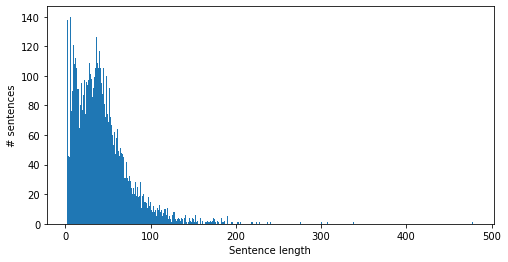

In [6]:
l1 = np.asarray([len(sent) for sents,_ in ar_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in ar_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2) # get all lengths of sentences in the corpus
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

## Creating the vocabulary for tokens and tags

In [7]:
tokens = {token for sents,_ in ar_dataloader_train for sent in sents for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,labels in ar_dataloader_train for tags in labels for tag in tags}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

33471
['<UNK>', 'الكرديات', 'للمال', 'الكونغرس', 'والي', 'اذون', 'صريح', 'لمطار', '2.225', 'امريكية', 'لإنتاج', 'نلتقي', 'زميلاه', 'وجورج', 'البقالة']
['CCONJ', 'ADP', 'AUX', 'VERB', 'SCONJ', 'X', None, 'ADV', 'PART', 'PROPN', 'NUM', 'PUNCT', 'ADJ', 'PRON', 'INTJ', 'DET', 'SYM', 'NOUN', '<PAD>']


## Data padding and encoding

In [8]:
def pad_and_encode(sentences, labels):
  assert len(sentences)==len(labels)
  assert np.all([len(sentence)==len(tags) for sentence, tags in zip(sentences, labels)])
  max_sentence_length = np.max([len(sentence) for sentence in sentences]) # Find out how much to pad
  padded_sentences = torch.zeros(len(sentences), max_sentence_length,     # Create data structures with <PAD> as default
                                 dtype=torch.long)
  padded_sentences[:] = token2idx['<PAD>']
  padded_labels = torch.zeros(len(sentences), max_sentence_length, 
                              dtype=torch.long)
  padded_labels[:] = tag2idx['<PAD>']
  for i, (sentence, tags) in enumerate(zip(sentences, labels)):
    for j, token in enumerate(sentence):
      if token in token2idx.keys():
        padded_sentences[i, j] = token2idx[token]
      else:
        padded_sentences[i, j] = token2idx['<UNK>']
    for j, tag in enumerate(tags):
      padded_labels[i, j] = tag2idx[tag]
  return padded_sentences, padded_labels

In [9]:
#paddding and encoding the dataloader
ar_dataloader_train=[pad_and_encode(sents, labels) for sents,labels in ar_dataloader_train]
ar_dataloader_test=[pad_and_encode(sents, labels) for sents,labels in ar_dataloader_test]

In [10]:
print(ar_dataloader_train[0])
print(ar_dataloader_test[0])

(tensor([[ 3725, 10633,  6723,  ..., 33470, 33470, 33470],
        [11124, 27705, 26028,  ..., 33470, 33470, 33470],
        [  845,  9920, 18817,  ..., 33470, 33470, 33470],
        ...,
        [27499, 10633,  5947,  ..., 33470, 33470, 33470],
        [30298,   116,  7663,  ..., 33470, 33470, 33470],
        [13122, 10633, 16161,  ..., 33470, 33470, 33470]]), tensor([[ 6,  0,  3,  ..., 18, 18, 18],
        [ 2,  1, 17,  ..., 18, 18, 18],
        [17, 12,  6,  ..., 18, 18, 18],
        ...,
        [ 6,  0,  3,  ..., 18, 18, 18],
        [ 6,  1, 17,  ..., 18, 18, 18],
        [ 6,  0, 15,  ..., 18, 18, 18]]))
(tensor([[13193, 29031,  2786,  ..., 33470, 33470, 33470],
        [19196, 13988, 27369,  ..., 33470, 33470, 33470],
        [ 2687, 10633, 15770,  ..., 33470, 33470, 33470],
        ...,
        [    0, 14755, 13735,  ..., 33470, 33470, 33470],
        [    0, 10633,     0,  ..., 33470, 33470, 33470],
        [30447, 10633, 29017,  ..., 33470, 33470, 33470]]), tensor([[ 3, 11, 

## LSTM Model

In [11]:
class LSTMTagger(nn.Module):
  def __init__(self, word_embedding_dim, lstm_hidden_dim, vocabulary_size, tagset_size):
   
    super(LSTMTagger, self).__init__()                                          
    self.lstm_hidden_dim_ = lstm_hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size

    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,        
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    self._lstm = nn.LSTM(input_size=word_embedding_dim,                         
                         hidden_size=lstm_hidden_dim,                           
                         batch_first=True)
    self._fc = nn.Linear(lstm_hidden_dim, tagset_size)                          
    #self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                                
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                               
      self.cuda()

  def forward(self, padded_sentences):
    """The forward pass through the network"""
    batch_size, max_sentence_length = padded_sentences.size()

    embedded_sentences = self._word_embedding(padded_sentences)                 

    sentence_lengths = (padded_sentences!=token2idx['<PAD>']).sum(dim=1)        
    sentence_lengths = sentence_lengths.long().cpu()                            
    X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                          batch_first=True, enforce_sorted=False)
    lstm_out, _ = self._lstm(X)                                                 
    X, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)         

    X = X.contiguous().view(-1, X.shape[2])                                     
    tag_scores = self._fc(X)                                                     
    #tag_scores = self._softmax(tag_space)    no need to implement softmax function if CrossEntropyloss function is used                                   
    return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)


model_1= LSTMTagger(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1)                                  
print(model_1)

LSTMTagger(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


## LSTM Network training

In [15]:
loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              #use CrossEntropy function
optimizer = torch.optim.AdamW(model_1.parameters(), lr=0.01)                     #use AdamW optimizer         
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")            #create a GPU device

for epoch in range(10):                                                        # Train the dataset
  with tqdm(ar_dataloader_train, 
            total=len(ar_dataloader_train)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
    for inputs, targets in batches:                                             
      inputs=inputs.to(device) #pushing data to GPU
      targets=targets.to(device) #oushing data to GPU
      model_1.zero_grad()                                                       # Gradients will accumulate,so need to be reset to 0
      scores = model_1(inputs)                                                  # get the scores
      loss = loss_function(scores.view(-1, model_1.tagset_size_),               # Get loss
                           targets.view(-1))               
      loss.backward()                                                           # Backpropagate to calculate gradients
      optimizer.step()                                                          # update the weight
      predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
      mask = targets!=tag2idx['<PAD>']                                          # Create a mask for ignoring <PAD> in the targets
      correct = (predictions[mask] == targets[mask]).sum().item()               # Sum all correct predictions
      accuracy = correct / mask.sum().item()*100
      model_1.training_accuracy_.append(accuracy)                                 
      model_1.training_loss_.append(loss.item())                                 
      batches.set_postfix(loss=loss.item(), accuracy=accuracy)                  

Epoch 0: 60batch [00:02, 23.79batch/s, accuracy=74.2, loss=0.824]                                                      
Epoch 1: 60batch [00:02, 23.85batch/s, accuracy=87.7, loss=0.417]                                                      
Epoch 2: 60batch [00:02, 23.86batch/s, accuracy=92.8, loss=0.26]                                                       
Epoch 3: 60batch [00:02, 23.54batch/s, accuracy=95.1, loss=0.168]                                                      
Epoch 4: 60batch [00:02, 22.21batch/s, accuracy=96.8, loss=0.116]                                                      
Epoch 5: 60batch [00:02, 22.10batch/s, accuracy=97.4, loss=0.0858]                                                     
Epoch 6: 60batch [00:02, 22.11batch/s, accuracy=98.1, loss=0.0623]                                                     
Epoch 7: 60batch [00:02, 22.05batch/s, accuracy=98.5, loss=0.0486]                                                     
Epoch 8: 60batch [00:02, 22.08batch/s, a

We can plot the stored loss over epochs.

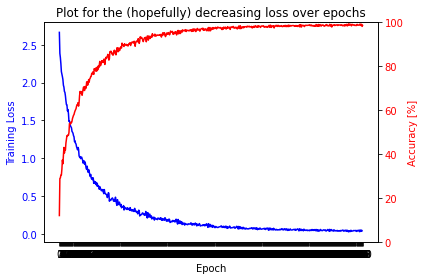

In [18]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model_1.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model_1.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model_1.training_accuracy_), len(ar_dataloader_train)//batch_size+1)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

## LSTM Test data accuracy

In [19]:
with torch.no_grad():                                  # For this part, we do not need calculate gradients, so put it under with to save ROM
  n_correct = 0
  n_total = 0
  for inputs, targets in ar_dataloader_test:            # Loop the test dataloader
    inputs=inputs.to(device)
    targets=targets.to(device)
    scores = model_1(inputs)                                                      # get the scores from the trained model
    predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  # get the most probale predictions
    mask = targets!=tag2idx['<PAD>']                                            # Create a mask for ignoring <PAD> in the targets
    n_correct += (predictions[mask] == targets[mask]).sum().item()              # Add all correct predictions
    n_total += mask.sum().item()
print("Test accuracy %.1f%%" % (100*n_correct/n_total))

Test accuracy 90.3%


# LSTM with different embedding dimensions

In [12]:
model_2= LSTMTagger(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1)                                  
print(model_1)

LSTMTagger(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


In [13]:
loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              #use CrossEntropy function
optimizer = torch.optim.AdamW(model_2.parameters(), lr=0.01)                     #use AdamW optimizer         
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")            #create a GPU device

for epoch in range(10):                                                        # Train the dataset
  with tqdm(ar_dataloader_train, 
            total=len(ar_dataloader_train)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
    for inputs, targets in batches:                                             
      inputs=inputs.to(device) #pushing data to GPU
      targets=targets.to(device) #oushing data to GPU
      model_2.zero_grad()                                                       # Gradients will accumulate,so need to be reset to 0
      scores = model_2(inputs)                                                  # get the scores
      loss = loss_function(scores.view(-1, model_2.tagset_size_),               # Get loss
                           targets.view(-1))               
      loss.backward()                                                           # Backpropagate to calculate gradients
      optimizer.step()                                                          # update the weight
      predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
      mask = targets!=tag2idx['<PAD>']                                          # Create a mask for ignoring <PAD> in the targets
      correct = (predictions[mask] == targets[mask]).sum().item()               # Add all correct predictions
      accuracy = correct / mask.sum().item()*100
      model_2.training_accuracy_.append(accuracy)                                 
      model_2.training_loss_.append(loss.item())                                 
      batches.set_postfix(loss=loss.item(), accuracy=accuracy)      

Epoch 0: 60batch [00:03, 16.58batch/s, accuracy=76.2, loss=0.743]                                                      
Epoch 1: 60batch [00:03, 19.92batch/s, accuracy=89.5, loss=0.35]                                                       
Epoch 2: 60batch [00:03, 17.35batch/s, accuracy=94.7, loss=0.191]                                                      
Epoch 3: 60batch [00:03, 17.73batch/s, accuracy=96.8, loss=0.116]                                                      
Epoch 4: 60batch [00:03, 17.89batch/s, accuracy=97.9, loss=0.0762]                                                     
Epoch 5: 60batch [00:03, 18.05batch/s, accuracy=98.6, loss=0.0556]                                                     
Epoch 6: 60batch [00:03, 18.17batch/s, accuracy=98.8, loss=0.0442]                                                     
Epoch 7: 60batch [00:03, 18.70batch/s, accuracy=99.2, loss=0.0296]                                                     
Epoch 8: 60batch [00:03, 18.66batch/s, a

In [14]:
with torch.no_grad():                                  # For this part, we do not need calculate gradients, so put it under with to save ROM
  n_correct = 0
  n_total = 0
  for inputs, targets in ar_dataloader_test:            # Loop the test dataloader
    inputs=inputs.to(device)
    targets=targets.to(device)
    scores = model_2(inputs)                                                      # get the scores from the trained model
    predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  # get the most probale predictions
    mask = targets!=tag2idx['<PAD>']                                            # Create a mask for ignoring <PAD> in the targets
    n_correct += (predictions[mask] == targets[mask]).sum().item()              # Add all correct predictions
    n_total += mask.sum().item()
print("Test accuracy %.1f%%" % (100*n_correct/n_total))

Test accuracy 91.4%


## Extension 2 GRU Model

In [21]:
class GRUTagger(nn.Module):
  def __init__(self, word_embedding_dim, gru_hidden_dim, vocabulary_size, tagset_size):
    super(GRUTagger, self).__init__()                                          
    self.gru_hidden_dim_ = gru_hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size

    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,         
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    self._gru = nn.GRU(input_size=word_embedding_dim,                       #chose pytorch built-in GRU module function                     
                         hidden_size=gru_hidden_dim,                           
                         batch_first=True)
    self._fc = nn.Linear(gru_hidden_dim, tagset_size)                          
    #self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                                
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                              
      self.cuda()

  def forward(self, padded_sentences):
    """The forward pass through the network"""
    batch_size, max_sentence_length = padded_sentences.size()

    embedded_sentences = self._word_embedding(padded_sentences)                    

    sentence_lengths = (padded_sentences!=token2idx['<PAD>']).sum(dim=1)        
    sentence_lengths = sentence_lengths.long().cpu()                            
    X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                          batch_first=True, enforce_sorted=False)
    gru_out, _ = self._gru(X)                                                 
    X, _ = nn.utils.rnn.pad_packed_sequence(gru_out, batch_first=True)         

    X = X.contiguous().view(-1, X.shape[2])                                     
    tag_score = self._fc(X)       # I decided to explore CrossEntropy loss, there is no need to calculate soft_max,because CrossEntropy includes it automatically                                                                                 
    return tag_score.view(batch_size, max_sentence_length, self.tagset_size_)


model_2 = GRUTagger(word_embedding_dim=32,                                      
                   gru_hidden_dim=64,                                         
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1)                                 
print(model_2)

GRUTagger(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_gru): GRU(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


## GRU Network training

In [23]:
loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              
optimizer = torch.optim.AdamW(model_2.parameters(), lr=0.01)                               
device=torch.device("cuda" if torch.cuda.is_available() else "cpu") 

for epoch in range(10):                                                          
  with tqdm(ar_dataloader_train, 
            total=len(ar_dataloader_train)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
    for inputs, targets in batches:                                             
      inputs=inputs.to(device) #pushing data to GPU
      targets=targets.to(device) #oushing data to GPU
      model_2.zero_grad()                                                         
      scores = model_2(inputs)                                                    
      loss = loss_function(scores.view(-1, model_2.tagset_size_),                 
                           targets.view(-1))               
      loss.backward()                                                           
      optimizer.step()                                                          
      predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
      mask = targets!=tag2idx['<PAD>']                                          
      correct = (predictions[mask] == targets[mask]).sum().item()               
      accuracy = correct / mask.sum().item()*100
      model_2.training_accuracy_.append(accuracy)                                 
      model_2.training_loss_.append(loss.item())                                  
      batches.set_postfix(loss=loss.item(), accuracy=accuracy)                  

Epoch 0: 60batch [00:02, 24.37batch/s, accuracy=76.1, loss=0.768]                                                      
Epoch 1: 60batch [00:02, 24.51batch/s, accuracy=88.3, loss=0.398]                                                      
Epoch 2: 60batch [00:02, 24.55batch/s, accuracy=93.2, loss=0.23]                                                       
Epoch 3: 60batch [00:02, 23.99batch/s, accuracy=96, loss=0.136]                                                        
Epoch 4: 60batch [00:02, 22.65batch/s, accuracy=97.4, loss=0.085]                                                      
Epoch 5: 60batch [00:02, 22.51batch/s, accuracy=98.1, loss=0.0625]                                                     
Epoch 6: 60batch [00:02, 22.57batch/s, accuracy=98.8, loss=0.045]                                                      
Epoch 7: 60batch [00:02, 22.63batch/s, accuracy=98.9, loss=0.0377]                                                     
Epoch 8: 60batch [00:02, 22.67batch/s, a

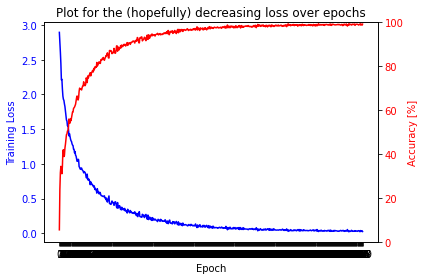

In [24]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model_2.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model_2.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model_2.training_accuracy_), len(ar_dataloader_train)//batch_size+1)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

## GRU Test data accuracy

In [25]:
with torch.no_grad():                                                           
  n_correct = 0
  n_total = 0
  for inputs, targets in ar_dataloader_test: # Loop once over the test data
    inputs=inputs.to(device)
    targets=targets.to(device)
    scores = model_2(inputs)                                                      
    predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  
    mask = targets!=tag2idx['<PAD>']                                            
    n_correct += (predictions[mask] == targets[mask]).sum().item()              
    n_total += mask.sum().item()
print("Test accuracy %.1f%%" % (100*n_correct/n_total))

Test accuracy 91.0%


## Extension 3 Bi directional LSTM Model

In [26]:
class BiLSTMTagger(nn.Module):
  def __init__(self, word_embedding_dim, bilstm_hidden_dim, vocabulary_size, tagset_size):
    
    super(BiLSTMTagger, self).__init__()                                         
    self.bilstm_hidden_dim_ = bilstm_hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size

    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,         
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    self._bilstm = nn.LSTM(input_size=word_embedding_dim,                        
                         hidden_size=bilstm_hidden_dim,                           
                         batch_first=True,bidirectional=True)  # set the bidirectional=True to realize Bi directional RNN model
    self._fc = nn.Linear(bilstm_hidden_dim*2, tagset_size)      # bidirectional needs twice hidden size                 
    #self._softmax = nn.LogSoftmax(dim=1)                                       
    
    self.training_loss_ = list()                                               
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                              
      self.cuda()

  def forward(self, padded_sentences):
    """The forward pass through the network"""
    batch_size, max_sentence_length = padded_sentences.size()

    embedded_sentences = self._word_embedding(padded_sentences)                 

    sentence_lengths = (padded_sentences!=token2idx['<PAD>']).sum(dim=1)       
    sentence_lengths = sentence_lengths.long().cpu()                            
    X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                          batch_first=True, enforce_sorted=False)
    bilstm_out, _ = self._bilstm(X)                                                 
    X, _ = nn.utils.rnn.pad_packed_sequence(bilstm_out, batch_first=True)         

    X = X.contiguous().view(-1, X.shape[2])                                     
    tag_scores = self._fc(X)                                                     
    #tag_scores = self._softmax(tag_space)                                       
    return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)


model_3 = BiLSTMTagger(word_embedding_dim=32,                                       
                   bilstm_hidden_dim=64,                                         
                   vocabulary_size=len(token2idx),                             
                   tagset_size=len(tag2idx)-1)                                  
print(model_3)

BiLSTMTagger(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_bilstm): LSTM(32, 64, batch_first=True, bidirectional=True)
  (_fc): Linear(in_features=128, out_features=18, bias=True)
)


## Bi directional LSTM Network training

In [27]:
loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              
optimizer = torch.optim.AdamW(model_3.parameters(), lr=0.01)                           
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")            
                                                               
for epoch in range(10):                                                        
  with tqdm(ar_dataloader_train, 
            total=len(ar_dataloader_train)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
    for inputs, targets in batches:                                             
      inputs=inputs.to(device) #pushing data to GPU
      targets=targets.to(device) #oushing data to GPU
      model_3.zero_grad()                                                         
      scores = model_3(inputs)                                                   
      loss = loss_function(scores.view(-1, model_3.tagset_size_),                 
                           targets.view(-1))               
      loss.backward()                                                           
      optimizer.step()                                                         
      predictions = scores.argmax(dim=2, keepdim=True).squeeze()               
      mask = targets!=tag2idx['<PAD>']                                          
      correct = (predictions[mask] == targets[mask]).sum().item()               
      accuracy = correct / mask.sum().item()*100
      model_3.training_accuracy_.append(accuracy)                                 
      model_3.training_loss_.append(loss.item())                                  
      batches.set_postfix(loss=loss.item(), accuracy=accuracy)                  

Epoch 0: 60batch [00:04, 13.65batch/s, accuracy=83.9, loss=0.519]                                                      
Epoch 1: 60batch [00:04, 14.39batch/s, accuracy=92.5, loss=0.235]                                                      
Epoch 2: 60batch [00:04, 13.88batch/s, accuracy=95.9, loss=0.127]                                                      
Epoch 3: 60batch [00:04, 13.81batch/s, accuracy=97.9, loss=0.07]                                                       
Epoch 4: 60batch [00:04, 13.80batch/s, accuracy=98.7, loss=0.0457]                                                     
Epoch 5: 60batch [00:04, 13.71batch/s, accuracy=99, loss=0.032]                                                        
Epoch 6: 60batch [00:04, 13.59batch/s, accuracy=99.5, loss=0.0198]                                                     
Epoch 7: 60batch [00:04, 13.35batch/s, accuracy=99.7, loss=0.0129]                                                     
Epoch 8: 60batch [00:04, 13.37batch/s, a

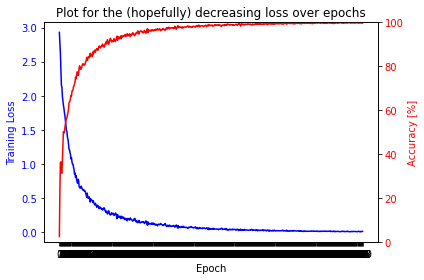

In [29]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model_3.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model_3.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model_3.training_accuracy_), len(ar_dataloader_train)//batch_size+1)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

## Bi directional LSTM Test data accuracy

In [30]:
with torch.no_grad():                                                           
  n_correct = 0
  n_total = 0
  for inputs, targets in ar_dataloader_test: # Loop once over the test data
    inputs=inputs.to(device)
    targets=targets.to(device)
    scores = model_3(inputs)                                                      
    predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  
    mask = targets!=tag2idx['<PAD>']                                            
    n_correct += (predictions[mask] == targets[mask]).sum().item()              
    n_total += mask.sum().item()
print("Test accuracy %.1f%%" % (100*n_correct/n_total))

Test accuracy 93.3%


## Extension 4 LSTM Dropout regularization

In [81]:
class DLSTMTagger(nn.Module):
  def __init__(self, word_embedding_dim, lstm_hidden_dim, vocabulary_size, tagset_size):
   
    super(DLSTMTagger, self).__init__()                                          
    self.lstm_hidden_dim_ = lstm_hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size

    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,        
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    self._lstm = nn.LSTM(input_size=word_embedding_dim,                         
                         hidden_size=lstm_hidden_dim,                           
                         batch_first=True)
    self._fc = nn.Sequential(nn.Linear(lstm_hidden_dim, tagset_size),nn.Dropout(0.2))  # add the drop at the fully connected layer                      
    #self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                                
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                               
      self.cuda()

  def forward(self, padded_sentences):
    """The forward pass through the network"""
    batch_size, max_sentence_length = padded_sentences.size()

    embedded_sentences = self._word_embedding(padded_sentences)                 

    sentence_lengths = (padded_sentences!=token2idx['<PAD>']).sum(dim=1)        
    sentence_lengths = sentence_lengths.long().cpu()                            
    X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                          batch_first=True, enforce_sorted=False)
    lstm_out, _ = self._lstm(X)                                                 
    X, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)         

    X = X.contiguous().view(-1, X.shape[2])                                     
    tag_scores = self._fc(X)                                                     
    #tag_scores = self._softmax(tag_space)    no need to implement softmax function if CrossEntropyloss function is used                                   
    return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)


model_Dp4= DLSTMTagger(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1)                                  
print(model_Dp4)

DLSTMTagger(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Sequential(
    (0): Linear(in_features=64, out_features=18, bias=True)
    (1): Dropout(p=0.2, inplace=False)
  )
)


## LSTM Dropout Network training

In [82]:
model_train=model_Dp4.train()# when train the data, we need to turn on the dropout
loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])             
optimizer = torch.optim.AdamW(model_train.parameters(), lr=0.01)                      
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")            
                                                               
for epoch in range(10):                                                          
  with tqdm(ar_dataloader_train, 
            total=len(ar_dataloader_train)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
    for inputs, targets in batches:                                             
      inputs=inputs.to(device) #pushing data to GPU
      targets=targets.to(device) #oushing data to GPU
      model_train.zero_grad()                                                         
      scores = model_train(inputs)                                                    
      loss = loss_function(scores.view(-1, model_train.tagset_size_),                 
                           targets.view(-1))               
      loss.backward()                                                           
      optimizer.step()                                                          
      predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
      mask = targets!=tag2idx['<PAD>']                                          
      correct = (predictions[mask] == targets[mask]).sum().item()               
      accuracy = correct / mask.sum().item()*100
      model_train.training_accuracy_.append(accuracy)                                 
      model_train.training_loss_.append(loss.item())                                  
      batches.set_postfix(loss=loss.item(), accuracy=accuracy)         

Epoch 0: 60batch [00:02, 23.54batch/s, accuracy=63.3, loss=1.13]                                                       
Epoch 1: 60batch [00:02, 23.64batch/s, accuracy=74.2, loss=0.774]                                                      
Epoch 2: 60batch [00:02, 23.33batch/s, accuracy=80, loss=0.599]                                                        
Epoch 3: 60batch [00:02, 21.95batch/s, accuracy=82.8, loss=0.497]                                                      
Epoch 4: 60batch [00:02, 21.81batch/s, accuracy=84.2, loss=0.452]                                                      
Epoch 5: 60batch [00:02, 21.70batch/s, accuracy=84.5, loss=0.409]                                                      
Epoch 6: 60batch [00:02, 21.84batch/s, accuracy=85.2, loss=0.387]                                                      
Epoch 7: 60batch [00:02, 21.99batch/s, accuracy=85, loss=0.371]                                                        
Epoch 8: 60batch [00:02, 21.91batch/s, a

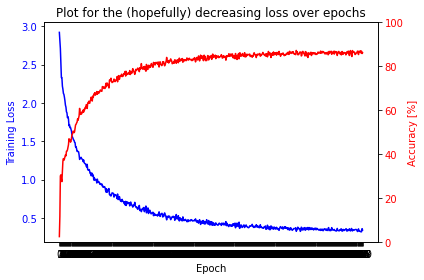

In [91]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model_Dp4.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model_Dp4.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model_Dp4.training_accuracy_), len(ar_dataloader_train)//batch_size+1)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

Based on the plot, we can see that the accuracy on the train data drops down, it seems a little odd, we need test data accuracy to confirm if the overfitting issue is tackled

## LSTM Dropout Test data accuracy

In [83]:
with torch.no_grad():                                                           
  n_correct = 0
  n_total = 0
  for inputs, targets in ar_dataloader_test: # Loop once over the test data
    inputs=inputs.to(device)
    targets=targets.to(device)
    model_test=model_Dp4.eval()  #when testing data,we need to turn off the dropout
    scores = model_test(inputs)                                                      
    predictions = scores.argmax(dim=2, keepdim=True).squeeze()                 
    mask = targets!=tag2idx['<PAD>']                                            
    n_correct += (predictions[mask] == targets[mask]).sum().item()              
    n_total += mask.sum().item()
print("Test accuracy %.1f%%" % (100*n_correct/n_total))

Test accuracy 91.8%


After adding the dropout regularization,even though the accuracy on the train data set declined by alomost 10%, the accuracy on the test data improved by 1.5% on the contrary,which fully verified that dropout can solve the overfitting issue.

## LSTM Weight decay regularization
for this part, I just use the initial model to compare performance of the model between with and without weight decay

In [88]:
model_d= LSTMTagger(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1)                                  
print(model_d)

LSTMTagger(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


In [89]:
loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              
optimizer_w = torch.optim.AdamW(model_d.parameters(), lr=0.01,weight_decay=1e-4)  #add weight decay parameter for optimizer     
device=torch.device("cuda" if torch.cuda.is_available() else "cpu") 

for epoch in range(10):                                                          
  with tqdm(ar_dataloader_train, 
            total=len(ar_dataloader_train)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
    for inputs, targets in batches:                                             
      inputs=inputs.to(device) #pushing data to GPU
      targets=targets.to(device) #oushing data to GPU
      model_d.zero_grad()                                                         
      scores = model_d(inputs)                                                    
      loss = loss_function(scores.view(-1, model_d.tagset_size_),                 
                           targets.view(-1))               
      loss.backward()                                                          
      optimizer_w.step()                                                          
      predictions = scores.argmax(dim=2, keepdim=True).squeeze()               
      mask = targets!=tag2idx['<PAD>']                                          
      correct = (predictions[mask] == targets[mask]).sum().item()               
      accuracy = correct / mask.sum().item()*100
      model_d.training_accuracy_.append(accuracy)                                 
      model_d.training_loss_.append(loss.item())                                 
      batches.set_postfix(loss=loss.item(), accuracy=accuracy)                 

Epoch 0: 60batch [00:02, 21.89batch/s, accuracy=67, loss=0.974]                                                        
Epoch 1: 60batch [00:02, 23.65batch/s, accuracy=80.4, loss=0.618]                                                      
Epoch 2: 60batch [00:02, 23.64batch/s, accuracy=87.7, loss=0.411]                                                      
Epoch 3: 60batch [00:02, 23.33batch/s, accuracy=92, loss=0.266]                                                        
Epoch 4: 60batch [00:02, 21.96batch/s, accuracy=95.6, loss=0.167]                                                      
Epoch 5: 60batch [00:03, 19.22batch/s, accuracy=96.4, loss=0.143]                                                      
Epoch 6: 60batch [00:03, 19.53batch/s, accuracy=95.9, loss=0.132]                                                      
Epoch 7: 60batch [00:02, 20.92batch/s, accuracy=97.1, loss=0.11]                                                       
Epoch 8: 60batch [00:02, 20.84batch/s, a

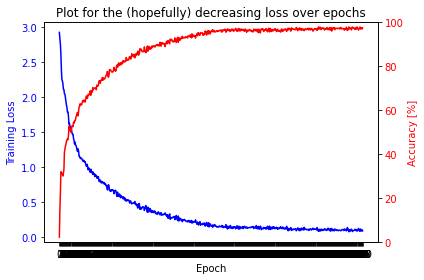

In [92]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model_d.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model_d.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model_d.training_accuracy_), len(ar_dataloader_train)//batch_size+1)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

Based on the plot, the accuracy on the train data did not change dramatically, we still need to investigate the test data accuracy

In [90]:
with torch.no_grad():                                                           
  n_correct = 0
  n_total = 0
  for inputs, targets in ar_dataloader_test: # Loop once over the test data
    inputs=inputs.to(device)
    targets=targets.to(device)
    scores = model_d(inputs)                                                      
    predictions = scores.argmax(dim=2, keepdim=True).squeeze()                 
    mask = targets!=tag2idx['<PAD>']                                            
    n_correct += (predictions[mask] == targets[mask]).sum().item()             
    n_total += mask.sum().item()
print("Test accuracy %.1f%%" % (100*n_correct/n_total))

Test accuracy 92.1%


After adding the weight decay regularization,even though the accuracy on the train data set declined by 1%, the accuracy on the test data improved by 1.8% on the contrary, which as well fully verified that weight_decay can solve the overfitting issue.

## Extension 5 LSTM Data augmentation
for this part, I just use the initial model to compare performance of the model between with and without data augmentation

In [92]:
from BackTranslation import BackTranslation
# I choose Back translation data augmentation method
trans = BackTranslation(url=[
      'translate.google.com',
      'translate.google.co.kr',
    ], proxies={'http': '127.0.0.1:1234', 'http://host.name': '127.0.0.1:4012'})

In [93]:
ar_dataloader_train_aug=DataLoader(dataset=ar_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=my_collate)#num_workers speed up the processing
ar_dataloader_test_aug=DataLoader(dataset=ar_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=my_collate)

In [94]:
import random
ar_dataloader_train_aug_new=ar_dataloader_train_aug
for i1,(sents,labels) in enumerate(ar_dataloader_train_aug_new):
    if i1<3: #just apply data augmentation methods on the first 3 batches to see if it works
        for i2,sent in enumerate(sents):
            sents[i2]=trans.translate(" ".join(sent),src="ar",tmp = 'zh-cn').result_text.split() #translate Arabic to Chinese and translate it back
            



In [95]:
#Get the back translation dataset
ar_dataloader_train_aug_new=[pad_and_encode(sents, labels) for i,(sents,labels) in enumerate(ar_dataloader_train_aug_new) if i<3]

In [96]:
ar_dataloader_train_aug=[pad_and_encode(sents, labels) for sents,labels in ar_dataloader_train_aug]
ar_dataloader_train_aug=ar_dataloader_train_aug_new[:3]+ar_dataloader_train_aug #get the augmented training data
ar_dataloader_test_aug=[pad_and_encode(sents, labels) for sents,labels in ar_dataloader_test_aug]

In [97]:
print(ar_dataloader_train_aug[-1])

(tensor([[15622, 21348,  9025,  ..., 33470, 33470, 33470],
        [32323, 21348, 31783,  ..., 33470, 33470, 33470],
        [ 8793, 14995, 14919,  ..., 33470, 33470, 33470],
        ...,
        [30806, 33200,  5873,  ..., 33470, 33470, 33470],
        [15326, 25508,   747,  ..., 33470, 33470, 33470],
        [ 2729, 26874,  4990,  ..., 33470, 33470, 33470]]), tensor([[ 8, 13,  1,  ..., 18, 18, 18],
        [ 8, 13,  1,  ..., 18, 18, 18],
        [ 2,  1,  0,  ..., 18, 18, 18],
        ...,
        [ 2,  2,  2,  ..., 18, 18, 18],
        [10,  8,  0,  ..., 18, 18, 18],
        [ 1,  8,  0,  ..., 18, 18, 18]]))


In [14]:
model_DA= LSTMTagger(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1)                                  
print(model_DA)

LSTMTagger(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


In [99]:
loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              
optimizer = torch.optim.AdamW(model_DA.parameters(), lr=0.01)                              
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")            

for epoch in range(10):                                                       
  with tqdm(ar_dataloader_train_aug, 
            total=len(ar_dataloader_train_aug)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
    for inputs, targets in batches:                                             
      inputs=inputs.to(device) #pushing data to GPU
      targets=targets.to(device) #oushing data to GPU
      model_DA.zero_grad()                                                       
      scores = model_DA(inputs)                                                  
      loss = loss_function(scores.view(-1, model_DA.tagset_size_),               
                           targets.view(-1))               
      loss.backward()                                                           
      optimizer.step()                                                          
      predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
      mask = targets!=tag2idx['<PAD>']                                          
      correct = (predictions[mask] == targets[mask]).sum().item()              
      accuracy = correct / mask.sum().item()*100
      model_DA.training_accuracy_.append(accuracy)                                 
      model_DA.training_loss_.append(loss.item())                                 
      batches.set_postfix(loss=loss.item(), accuracy=accuracy)  

Epoch 0: 63batch [00:02, 24.20batch/s, accuracy=74.2, loss=0.807]                                                      
Epoch 1: 63batch [00:02, 24.30batch/s, accuracy=87.2, loss=0.418]                                                      
Epoch 2: 63batch [00:02, 24.29batch/s, accuracy=92.4, loss=0.248]                                                      
Epoch 3: 63batch [00:02, 24.23batch/s, accuracy=95.7, loss=0.156]                                                      
Epoch 4: 63batch [00:02, 24.18batch/s, accuracy=96.9, loss=0.107]                                                      
Epoch 5: 63batch [00:02, 24.31batch/s, accuracy=97.8, loss=0.0775]                                                     
Epoch 6: 63batch [00:02, 24.20batch/s, accuracy=98.3, loss=0.0568]                                                     
Epoch 7: 63batch [00:02, 24.18batch/s, accuracy=98.8, loss=0.0426]                                                     
Epoch 8: 63batch [00:02, 23.93batch/s, a

In [100]:
with torch.no_grad():                                  
  n_correct = 0
  n_total = 0
  for inputs, targets in ar_dataloader_test_aug:           
    inputs=inputs.to(device)
    targets=targets.to(device)
    scores = model_DA(inputs)                                                      
    predictions = scores.argmax(dim=2, keepdim=True).squeeze()                 
    mask = targets!=tag2idx['<PAD>']                                            
    n_correct += (predictions[mask] == targets[mask]).sum().item()              
    n_total += mask.sum().item()
print("Test accuracy %.1f%%" % (100*n_correct/n_total))

Test accuracy 91.2%


Based on the result above, my test data accuracy improved by 0.9%, which proves that back translation data augmentation increased my model generability.

## Refactor the given model as a class 
In my refactored model class, I include pad_and_encode,fit(training the model and backword is included),score(get the test dataset accuracy),forward methods(it's similar to the predict method in the sklearn Classifier)

In [239]:
class LSTMTaggerRe(nn.Module):
  def __init__(self, word_embedding_dim, lstm_hidden_dim, vocabulary_size, tagset_size,device):
   
    super(LSTMTaggerRe, self).__init__()                                          
    self.lstm_hidden_dim_ = lstm_hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size
    self.device=device


    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,        
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    self._lstm = nn.LSTM(input_size=word_embedding_dim,                         
                         hidden_size=lstm_hidden_dim,                           
                         batch_first=True)
    self._fc = nn.Linear(lstm_hidden_dim, tagset_size)                          
    #self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                                
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                               
      self.cuda()

    

  def pad_and_encode(self,sentences, labels):
    assert len(sentences)==len(labels)
    assert np.all([len(sentence)==len(tags) for sentence, tags in zip(sentences, labels)])
    max_sentence_length = np.max([len(sentence) for sentence in sentences]) 
    padded_sentences = torch.zeros(len(sentences), max_sentence_length,     
                                 dtype=torch.long)
    padded_sentences[:] = token2idx['<PAD>']
    padded_labels = torch.zeros(len(sentences), max_sentence_length, 
                              dtype=torch.long)
    padded_labels[:] = tag2idx['<PAD>']
    for i, (sentence, tags) in enumerate(zip(sentences, labels)):
      for j, token in enumerate(sentence):
        if token in token2idx.keys():
          padded_sentences[i, j] = token2idx[token]
        else:
          padded_sentences[i, j] = token2idx['<UNK>']
      for j, tag in enumerate(tags):
        padded_labels[i, j] = tag2idx[tag]
    return padded_sentences, padded_labels



  def forward(self, padded_sentences):
    batch_size, max_sentence_length = padded_sentences.size()

    embedded_sentences = self._word_embedding(padded_sentences)                 

    sentence_lengths = (padded_sentences!=token2idx['<PAD>']).sum(dim=1)        
    sentence_lengths = sentence_lengths.long().cpu()                            
    X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                          batch_first=True, enforce_sorted=False)
    lstm_out, _ = self._lstm(X)                                                 
    X, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)         

    X = X.contiguous().view(-1, X.shape[2])                                     
    tag_scores = self._fc(X)                                                     
    #tag_scores = self._softmax(tag_space)                                    
    return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)

  
  def score(self,data_loader):

    data_loader=[self.pad_and_encode(sents, labels) for sents,labels in data_loader]
    
    with torch.no_grad():                                  
        n_correct = 0
        n_total = 0
        for inputs, targets in data_loader:
            inputs,targets=inputs.to(self.device),targets.to(self.device)
            scores = self.forward(inputs)                                                      
            predictions = scores.argmax(dim=2, keepdim=True).squeeze()                 
            mask = targets!=tag2idx['<PAD>']                                            
            n_correct += (predictions[mask] == targets[mask]).sum().item()              
            n_total += mask.sum().item()
        return 100*(n_correct/n_total)
  
        
    
  def fit(self,data_loader,learning_rate,epochs):
    
    data_loader=[self.pad_and_encode(sents, labels) for sents,labels in data_loader]

    loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              
    optimizer = torch.optim.AdamW(self.parameters(), lr=learning_rate)                                      

    for epoch in range(epochs):                                                        
        with tqdm(data_loader, 
            total=len(data_loader)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
            for inputs, targets in batches: 
                inputs,targets=inputs.to(self.device),targets.to(self.device)
                self.zero_grad()                                                        
                scores = self.forward(inputs)                                                  
                loss = loss_function(scores.view(-1, self.tagset_size_),              
                           targets.view(-1))               
                loss.backward()                                                           
                optimizer.step()                                                         
                predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
                mask = targets!=tag2idx['<PAD>']                                          
                correct = (predictions[mask] == targets[mask]).sum().item()               
                accuracy = correct / mask.sum().item()*100
                self.training_accuracy_.append(accuracy)                                 
                self.training_loss_.append(loss.item())                                 
                batches.set_postfix(loss=loss.item(), accuracy=accuracy)                  
    

In [19]:
model_refa= LSTMTaggerRe(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))                                  
print(model_refa)

LSTMTaggerRe(
  (_word_embedding): Embedding(33471, 32, padding_idx=33470)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


In [21]:
model_refa.fit(ar_dataloader_train,0.01,10)

Epoch 0: 60batch [00:03, 16.89batch/s, accuracy=75.5, loss=0.76]                                                       
Epoch 1: 60batch [00:03, 18.48batch/s, accuracy=90.2, loss=0.341]                                                      
Epoch 2: 60batch [00:03, 17.62batch/s, accuracy=94.6, loss=0.19]                                                       
Epoch 3: 60batch [00:03, 18.54batch/s, accuracy=96.7, loss=0.114]                                                      
Epoch 4: 60batch [00:03, 18.41batch/s, accuracy=97.8, loss=0.0751]                                                     
Epoch 5: 60batch [00:03, 18.54batch/s, accuracy=98.4, loss=0.0519]                                                     
Epoch 6: 60batch [00:03, 18.48batch/s, accuracy=98.9, loss=0.0399]                                                     
Epoch 7: 60batch [00:03, 17.52batch/s, accuracy=98.8, loss=0.0355]                                                     
Epoch 8: 60batch [00:03, 18.30batch/s, a

In [22]:
model_refa.score(ar_dataloader_test)

89.77329347284504

As above showed, the refactored model worked!

## Extension 6 Add more language sources

## Load the Chinese corpus

In [4]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Chinese-GSD/master/zh_gsd-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Chinese-GSD/master/zh_gsd-ud-test.conllu

--2021-05-17 23:25:04--  https://raw.githubusercontent.com/UniversalDependencies/UD_Chinese-GSD/master/zh_gsd-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5438584 (5.2M) [text/plain]
Saving to: 'zh_gsd-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 8.36M 1s
    50K .......... .......... .......... .......... ..........  1% 29.7M 0s
   100K .......... .......... .......... .......... ..........  2% 13.5M 0s
   150K .......... .......... .......... .......... ..........  3% 27.4M 0s
   200K .......... .......... .......... .......... ..........  4% 36.2M 0s
   250K .......... .......... .......... .......... ..........  5% 9.10M 0s
   300K .......... .......... .......... .......... ..........  6% 14.4M 

--2021-05-17 23:25:04--  https://raw.githubusercontent.com/UniversalDependencies/UD_Chinese-GSD/master/zh_gsd-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 663318 (648K) [text/plain]
Saving to: 'zh_gsd-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  7% 7.24M 0s
    50K .......... .......... .......... .......... .......... 15% 34.9M 0s
   100K .......... .......... .......... .......... .......... 23% 18.1M 0s
   150K .......... .......... .......... .......... .......... 30% 41.1M 0s
   200K .......... .......... .......... .......... .......... 38% 12.5M 0s
   250K .......... .......... .......... .......... .......... 46% 27.5M 0s
   300K .......... .......... .......... .......... .......... 54% 21.4M 0s


After exploring the arabic dataset, I found it's a little redundant to use the way above to implenment padding and encoding,in this case, I made some modification to simplify my code

In [6]:
zh_dataset_train=CorpusDataset("./zh_gsd-ud-train.conllu")
zh_dataset_test=CorpusDataset("./zh_gsd-ud-test.conllu")

In [7]:
print(len(zh_dataset_train))
print(len(zh_dataset_test))
print(zh_dataset_train[0])
print(zh_dataset_test[0])

3997
500
(['看似', '簡單', '，', '只', '是', '二', '選', '一', '做', '決擇', '，', '但', '其實', '他們', '代表', '的', '是', '你', '周遭', '的', '親朋', '好友', '，', '試', '著', '給', '你', '不同', '的', '意見', '，', '但', '追根究底', '，', '最後', '決定', '的', '還是', '自己', '。'], ['AUX', 'ADJ', 'PUNCT', 'ADV', 'VERB', 'NUM', 'VERB', 'NUM', 'VERB', 'NOUN', 'PUNCT', 'ADV', 'ADV', 'PRON', 'VERB', 'PART', 'AUX', 'PRON', 'NOUN', 'PART', 'NOUN', 'NOUN', 'PUNCT', 'VERB', 'AUX', 'VERB', 'PRON', 'ADJ', 'PART', 'NOUN', 'PUNCT', 'ADV', 'VERB', 'PUNCT', 'NOUN', 'VERB', 'PART', 'AUX', 'PRON', 'PUNCT'])
(['然而', '，', '這樣', '的', '處理', '也', '衍生', '了', '一些', '問題', '。'], ['ADV', 'PUNCT', 'PRON', 'PART', 'NOUN', 'ADV', 'VERB', 'AUX', 'ADJ', 'NOUN', 'PUNCT'])


In [8]:
# I will create vocab before load the train_dataset and test_dataset
tokens = {token for sent,_ in zh_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in zh_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)
    

17614
['<UNK>', '煙霧', '猴群', '佩蘭多', '湘西', '生產', '小田急', '炸毀', '盛妝', '西門子', '1920', '實體', '摩托', '襄陽', '轟炸']
['PROPN', 'CCONJ', 'NOUN', 'ADP', 'NUM', 'ADV', 'PRON', 'X', 'VERB', 'PART', 'DET', 'SYM', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [11]:
# then collate_fun for the train and test dataloader will be the pad_and_encode function with minor changes

def pad_and_encode(batch):# the variable must be batch if I treat it as collate function inside the dataloader
  sentences=[sentences for sentences,_ in batch]
  labels=[labels for _,labels in batch]
  assert len(sentences)==len(labels)
  assert np.all([len(sentence)==len(tags) for sentence, tags in zip(sentences, labels)])
  max_sentence_length = np.max([len(sentence) for sentence in sentences]) # Find out how much to pad
  padded_sentences = torch.zeros(len(sentences), max_sentence_length,     # Create data structures with <PAD> as default
                                 dtype=torch.long)
  padded_sentences[:] = token2idx['<PAD>']
  padded_labels = torch.zeros(len(sentences), max_sentence_length, 
                              dtype=torch.long)
  padded_labels[:] = tag2idx['<PAD>']
  for i, (sentence, tags) in enumerate(zip(sentences, labels)):
    for j, token in enumerate(sentence):
      if token in token2idx.keys():
        padded_sentences[i, j] = token2idx[token]
      else:
        padded_sentences[i, j] = token2idx['<UNK>']
    for j, tag in enumerate(tags):
      padded_labels[i, j] = tag2idx[tag] 
  return padded_sentences, padded_labels

In [14]:
zh_dataloader_train=DataLoader(dataset=zh_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
zh_dataloader_test=DataLoader(dataset=zh_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

In [88]:
examples=iter(zh_dataloader_train)
examples2=iter(zh_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([ 1510, 12911, 13217,   209, 14353,  2424, 17007,  9376,  2152,  1790,
         2561, 13613,  9402,  2499,  4910,  5854, 17613, 17613, 17613, 17613,
        17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613,
        17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613,
        17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613])
tensor([ 5, 13,  2, 11,  7,  0, 10,  3, 14, 13,  5, 13, 13, 13,  3,  3, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15])
tensor([    0,  2275,  5096,  8488, 10774, 13419,  2189,  8423,  5854, 17613,
        17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613,
        17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613,
        17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613,
        17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 17613, 1

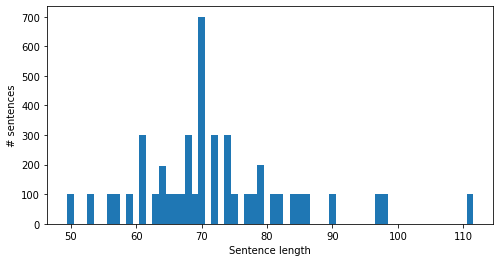

In [89]:
l1 = np.asarray([len(sent) for sents,_ in zh_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in zh_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

Based on the plot above, we can conclude that the sents length for Chinese dataset varies from about 40 to 120

In [4]:
#Because I include the pad_and_encode fun in the dataloader, the class won't need this function
class LSTMTagger_new(nn.Module):
  def __init__(self, word_embedding_dim, lstm_hidden_dim, vocabulary_size, tagset_size,device):
   
    super(LSTMTagger_new, self).__init__()                                          
    self.lstm_hidden_dim_ = lstm_hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size
    self.device=device


    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,        
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    self._lstm = nn.LSTM(input_size=word_embedding_dim,                         
                         hidden_size=lstm_hidden_dim,                           
                         batch_first=True)
    self._fc = nn.Linear(lstm_hidden_dim, tagset_size)                          
    #self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                                
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                               
      self.cuda()



  def forward(self, padded_sentences):
    batch_size, max_sentence_length = padded_sentences.size()

    embedded_sentences = self._word_embedding(padded_sentences)                 

    sentence_lengths = (padded_sentences!=token2idx['<PAD>']).sum(dim=1)        
    sentence_lengths = sentence_lengths.long().cpu()                            
    X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                          batch_first=True, enforce_sorted=False)
    lstm_out, _ = self._lstm(X)                                                 
    X, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)         

    X = X.contiguous().view(-1, X.shape[2])                                     
    tag_scores = self._fc(X)                                                     
    #tag_scores = self._softmax(tag_space)                                    
    return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)

  
  def score(self,data_loader):
    
    with torch.no_grad():                                  
        n_correct = 0
        n_total = 0
        for inputs, targets in data_loader:
            inputs,targets=inputs.to(self.device),targets.to(self.device)
            scores = self.forward(inputs)                                                      
            predictions = scores.argmax(dim=2, keepdim=True).squeeze()                 
            mask = targets!=tag2idx['<PAD>']                                            
            n_correct += (predictions[mask] == targets[mask]).sum().item()              
            n_total += mask.sum().item()
        return 100*(n_correct/n_total)
  
        
    
  def fit(self,data_loader,learning_rate,epochs):

    loss_function = nn.CrossEntropyLoss(ignore_index=tag2idx['<PAD>'])              
    optimizer = torch.optim.AdamW(self.parameters(), lr=learning_rate)                                      

    for epoch in range(epochs):                                                        
        with tqdm(data_loader, 
            total=len(data_loader)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
            for inputs, targets in batches: 
                inputs,targets=inputs.to(self.device),targets.to(self.device)
                self.zero_grad()                                                        
                scores = self.forward(inputs)                                                  
                loss = loss_function(scores.view(-1, self.tagset_size_),              
                           targets.view(-1))               
                loss.backward()                                                           
                optimizer.step()                                                         
                predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
                mask = targets!=tag2idx['<PAD>']                                          
                correct = (predictions[mask] == targets[mask]).sum().item()               
                accuracy = correct / mask.sum().item()*100
                self.training_accuracy_.append(accuracy)                                 
                self.training_loss_.append(loss.item())                                 
                batches.set_postfix(loss=loss.item(), accuracy=accuracy)  

In [91]:
model_zh=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_zh)

LSTMTagger_new(
  (_word_embedding): Embedding(17614, 32, padding_idx=17613)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=15, bias=True)
)


In [92]:
model_zh.fit(zh_dataloader_train,0.01,10)

Epoch 0: 40batch [00:01, 22.47batch/s, accuracy=57.4, loss=1.28]                                                       
Epoch 1: 40batch [00:02, 17.59batch/s, accuracy=76.4, loss=0.77]                                                       
Epoch 2: 40batch [00:02, 16.56batch/s, accuracy=82.6, loss=0.566]                                                      
Epoch 3: 40batch [00:02, 15.41batch/s, accuracy=87.2, loss=0.4]                                                        
Epoch 4: 40batch [00:02, 15.80batch/s, accuracy=91.4, loss=0.28]                                                       
Epoch 5: 40batch [00:02, 16.08batch/s, accuracy=93.4, loss=0.211]                                                      
Epoch 6: 40batch [00:02, 16.35batch/s, accuracy=94.4, loss=0.161]                                                      
Epoch 7: 40batch [00:02, 16.20batch/s, accuracy=96.3, loss=0.129]                                                      
Epoch 8: 40batch [00:02, 16.21batch/s, a

In [93]:
model_zh.score(zh_dataloader_test)

83.999333999334

In [94]:
model_zh2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_zh2)

LSTMTagger_new(
  (_word_embedding): Embedding(17614, 40, padding_idx=17613)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=15, bias=True)
)


In [95]:
model_zh2.fit(zh_dataloader_train,0.01,10)

Epoch 0: 40batch [00:01, 21.25batch/s, accuracy=65.7, loss=1.09]                                                       
Epoch 1: 40batch [00:01, 21.38batch/s, accuracy=77.6, loss=0.699]                                                      
Epoch 2: 40batch [00:01, 20.83batch/s, accuracy=85.7, loss=0.465]                                                      
Epoch 3: 40batch [00:02, 16.88batch/s, accuracy=89.6, loss=0.333]                                                      
Epoch 4: 40batch [00:02, 15.43batch/s, accuracy=93.2, loss=0.224]                                                      
Epoch 5: 40batch [00:02, 15.73batch/s, accuracy=95.3, loss=0.145]                                                      
Epoch 6: 40batch [00:02, 15.78batch/s, accuracy=96.4, loss=0.109]                                                      
Epoch 7: 40batch [00:02, 14.64batch/s, accuracy=97.4, loss=0.0923]                                                     
Epoch 8: 40batch [00:02, 14.21batch/s, a

In [96]:
model_zh2.score(zh_dataloader_test)

84.43223443223444

## Load the English corpus

In [115]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_English-GUM/dev/en_gum-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_English-GUM/dev/en_gum-ud-test.conllu

--2021-05-18 01:26:03--  https://raw.githubusercontent.com/UniversalDependencies/UD_English-GUM/dev/en_gum-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8125779 (7.7M) [text/plain]
Saving to: 'en_gum-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 10.3M 1s
    50K .......... .......... .......... .......... ..........  1% 60.2M 0s
   100K .......... .......... .......... .......... ..........  1% 8.48M 1s
   150K .......... .......... .......... .......... ..........  2%  106M 0s
   200K .......... .......... .......... .......... ..........  3% 40.5M 0s
   250K .......... .......... .......... .......... ..........  3% 12.4M 0s
   300K .......... .......... .......... .......... ..........  4% 24.6M 0s


--2021-05-18 01:26:04--  https://raw.githubusercontent.com/UniversalDependencies/UD_English-GUM/dev/en_gum-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1279092 (1.2M) [text/plain]
Saving to: 'en_gum-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  4% 10.0M 0s
    50K .......... .......... .......... .......... ..........  8% 26.8M 0s
   100K .......... .......... .......... .......... .......... 12% 12.8M 0s
   150K .......... .......... .......... .......... .......... 16% 10.9M 0s
   200K .......... .......... .......... .......... .......... 20% 14.6M 0s
   250K .......... .......... .......... .......... .......... 24% 14.4M 0s
   300K .......... .......... .......... .......... .......... 28% 14.9M 0s
  

In [9]:
en_dataset_train=CorpusDataset("./en_gum-ud-train.conllu")
en_dataset_test=CorpusDataset("en_gum-ud-test.conllu")

In [10]:
print(len(en_dataset_train))
print(len(en_dataset_test))
print(en_dataset_train[0])
print(en_dataset_test[0])

5307
836
(['Aesthetic', 'Appreciation', 'and', 'Spanish', 'Art', ':'], ['ADJ', 'NOUN', 'CCONJ', 'ADJ', 'NOUN', 'PUNCT'])
(['The', 'prevalence', 'of', 'discrimination', 'across', 'racial', 'groups', 'in', 'contemporary', 'America', ':'], ['DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'ADP', 'ADJ', 'PROPN', 'PUNCT'])


In [13]:
tokens = {token for sent,_ in en_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in en_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

14185
['<UNK>', 'kind', 'tool', 'bringing', 'drug', 'License', '1920', 'swelling', 'efficient', 'crocheting', 'Universidad', 'discussions', 'sufficient', 'machines', 'Neo']
['PROPN', 'SCONJ', 'CCONJ', 'NOUN', 'ADP', None, 'INTJ', 'PRON', 'ADV', 'NUM', 'X', 'VERB', 'DET', 'PART', 'SYM', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [118]:
en_dataloader_train=DataLoader(dataset=en_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
en_dataloader_test=DataLoader(dataset=en_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

In [119]:
examples=iter(en_dataloader_train)
examples2=iter(en_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([ 5592,  1070,  8308, 13779,  9402,  8361, 12066, 10745, 12403,  5453,
        13633,  1070,  1325,  5659,  5488,  6294,  9449,  5488,  4013, 10476,
        13430, 12403,  3671,  2310, 14184, 14184, 14184, 14184, 14184, 14184,
        14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184,
        14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184,
        14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184, 14184,
        14184, 14184])
tensor([ 8,  3,  9, 16, 15, 16,  5, 16,  1, 16, 16,  3,  0,  1,  9, 16,  1,  9,
        17,  8,  8,  1,  8,  3, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18])
tensor([10851, 12403,  4647,  9984,  2923,  9271,     0,  6466,  2559, 10437,
         6339,  1070, 12403,  5106,  2923,     0,  4647,  8742, 12954,  9351,
         9768, 12091,  1898,     0,     0,     0,  2310, 14184, 14184, 1

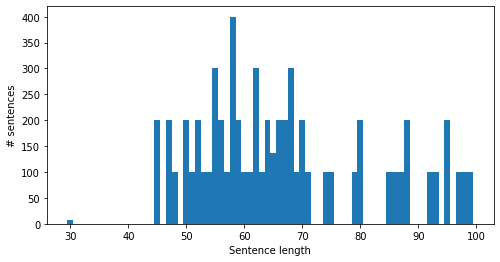

In [120]:
l1 = np.asarray([len(sent) for sents,_ in en_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in en_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

Based on the plot above, we can conclude that lenght of sentences mainly lingers from 50 to 70

In [132]:
model_en=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_en)

LSTMTagger_new(
  (_word_embedding): Embedding(14185, 32, padding_idx=14184)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


In [133]:
model_en.fit(en_dataloader_train,0.01,10)

Epoch 0: 54batch [00:02, 26.24batch/s, accuracy=69, loss=0.992]                                                        
Epoch 1: 54batch [00:02, 26.51batch/s, accuracy=77.3, loss=0.658]                                                      
Epoch 2: 54batch [00:02, 26.60batch/s, accuracy=82.6, loss=0.466]                                                      
Epoch 3: 54batch [00:02, 26.60batch/s, accuracy=95.1, loss=0.166]                                                      
Epoch 4: 54batch [00:02, 26.40batch/s, accuracy=91.5, loss=0.358]                                                      
Epoch 5: 54batch [00:02, 26.36batch/s, accuracy=95.9, loss=0.186]                                                      
Epoch 6: 54batch [00:02, 26.52batch/s, accuracy=96.7, loss=0.108]                                                      
Epoch 7: 54batch [00:02, 26.21batch/s, accuracy=95.7, loss=0.14]                                                       
Epoch 8: 54batch [00:02, 23.72batch/s, a

In [134]:
model_en.score(en_dataloader_test)

83.08873614465291

In [141]:
model_en2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_en2)

LSTMTagger_new(
  (_word_embedding): Embedding(14185, 40, padding_idx=14184)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=18, bias=True)
)


In [136]:
model_en2.fit(en_dataloader_train,0.01,10)

Epoch 0: 54batch [00:02, 22.77batch/s, accuracy=67.3, loss=0.872]                                                      
Epoch 1: 54batch [00:02, 25.05batch/s, accuracy=89.8, loss=0.326]                                                      
Epoch 2: 54batch [00:02, 25.22batch/s, accuracy=88.1, loss=0.328]                                                      
Epoch 3: 54batch [00:02, 19.95batch/s, accuracy=92, loss=0.238]                                                        
Epoch 4: 54batch [00:02, 18.18batch/s, accuracy=95.8, loss=0.149]                                                      
Epoch 5: 54batch [00:02, 18.37batch/s, accuracy=96.5, loss=0.0865]                                                     
Epoch 6: 54batch [00:03, 17.72batch/s, accuracy=96.3, loss=0.0903]                                                     
Epoch 7: 54batch [00:03, 17.79batch/s, accuracy=96.7, loss=0.108]                                                      
Epoch 8: 54batch [00:02, 18.26batch/s, a

In [137]:
model_en2.score(en_dataloader_test)

84.40151092946931

## Load the  Greek Corpus

In [16]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Greek-GDT/dev/el_gdt-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Greek-GDT/dev/el_gdt-ud-test.conllu

--2021-05-18 19:24:23--  https://raw.githubusercontent.com/UniversalDependencies/UD_Greek-GDT/dev/el_gdt-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3857960 (3.7M) [text/plain]
Saving to: 'el_gdt-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  1% 9.69M 0s
    50K .......... .......... .......... .......... ..........  2% 28.3M 0s
   100K .......... .......... .......... .......... ..........  3% 10.2M 0s
   150K .......... .......... .......... .......... ..........  5% 11.4M 0s
   200K .......... .......... .......... .......... ..........  6% 13.5M 0s
   250K .......... .......... .......... .......... ..........  7% 14.3M 0s
   300K .......... .......... .......... .......... ..........  9% 9.53M 0s
  

In [204]:
el_dataset_train=CorpusDataset("./el_gdt-ud-train.conllu")
el_dataset_test=CorpusDataset("./el_gdt-ud-test.conllu")

In [205]:
print(len(el_dataset_train))
print(len(el_dataset_test))
print(el_dataset_train[0])
print(el_dataset_test[0])

1631
441
(['Η', 'Μάντσεστερ', 'Γιουνάιτεντ', 'ηττήθηκε', 'από', 'την', 'Ατλέτικο', 'Μπιλμπάο', 'με', 'σκορ', '2:3'], ['DET', 'X', 'X', 'VERB', 'ADP', 'DET', 'X', 'X', 'ADP', 'X', 'NUM'])
(['Κύριε', 'Πρόεδρε', ',', 'το', 'ζήτημα', 'του', 'ευρωπαϊκού', 'εντάλματος', 'σύλληψης', 'είναι', 'πραγματικά', 'πολύ', 'περίεργο', ',', 'όχι', 'μόνο', 'διότι', 'παραμένουν', 'ασαφή', 'σημαντικά', 'θέματα', ',', 'αλλά', 'και', 'διότι', 'το', 'Κοινοβούλιο', 'δεν', 'τολμά', 'να', 'επιβάλει', 'τις', 'θέσεις', 'επί', 'των', 'οποίων', 'συμφωνεί', '.'], ['NOUN', 'NOUN', 'PUNCT', 'DET', 'NOUN', 'DET', 'ADJ', 'NOUN', 'NOUN', 'AUX', 'ADV', 'ADV', 'ADJ', 'PUNCT', 'ADV', 'ADV', 'SCONJ', 'VERB', 'ADJ', 'ADJ', 'NOUN', 'PUNCT', 'CCONJ', 'CCONJ', 'SCONJ', 'DET', 'NOUN', 'PART', 'VERB', 'AUX', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'PRON', 'VERB', 'PUNCT'])


In [206]:
tokens = {token for sent,_ in el_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in el_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

9031
['<UNK>', 'ακρογωνιαίο', 'κοινής', 'δεκαετούς', 'οτιδήποτε', '1920', 'αναπτυχθεί', 'αγοράζονται', 'παρέλευση', 'οδικών', 'κατέδειξε', 'Δεκαεννέα', 'συγκεκριμένους', 'Κατά', 'προετοιμάζουν']
['PROPN', 'SCONJ', 'CCONJ', 'ADP', 'NOUN', None, 'X', 'NUM', 'ADV', 'PRON', 'VERB', 'DET', 'PART', 'SYM', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [207]:
el_dataloader_train=DataLoader(dataset=el_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
el_dataloader_test=DataLoader(dataset=el_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

In [208]:
examples=iter(el_dataloader_train)
examples2=iter(el_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([4346, 6038, 2705,  497, 8693, 4739, 2210, 8596, 8719, 5391, 6542, 1091,
        2118,  906, 7934, 8353, 3161, 1574, 6210, 4739,  458, 5664, 6212, 4168,
        9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030,
        9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030,
        9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030,
        9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030,
        9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030,
        9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030, 9030,
        9030, 9030, 9030, 9030, 9030])
tensor([11,  4, 10,  5,  3, 11,  0, 11,  4, 16,  4,  4, 14, 11,  9, 10,  8,  4,
         3, 11,  4, 11,  0, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
 

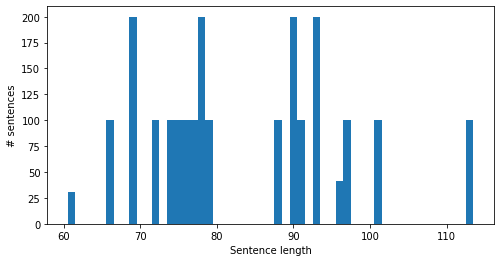

In [209]:
l1 = np.asarray([len(sent) for sents,_ in el_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in el_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [210]:
model_el=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_el)

LSTMTagger_new(
  (_word_embedding): Embedding(9031, 32, padding_idx=9030)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=17, bias=True)
)


In [211]:
model_el.fit(el_dataloader_train,0.01,10)

Epoch 0: 17batch [00:00, 20.84batch/s, accuracy=52.9, loss=1.67]                                                       
Epoch 1: 17batch [00:00, 21.23batch/s, accuracy=67.2, loss=1.09]                                                       
Epoch 2: 17batch [00:00, 20.08batch/s, accuracy=79.1, loss=0.7]                                                        
Epoch 3: 17batch [00:01, 15.88batch/s, accuracy=82.8, loss=0.574]                                                      
Epoch 4: 17batch [00:01, 14.94batch/s, accuracy=89.2, loss=0.399]                                                      
Epoch 5: 17batch [00:01, 15.23batch/s, accuracy=92.1, loss=0.283]                                                      
Epoch 6: 17batch [00:01, 15.13batch/s, accuracy=93.6, loss=0.229]                                                      
Epoch 7: 17batch [00:01, 14.93batch/s, accuracy=97, loss=0.123]                                                        
Epoch 8: 17batch [00:01, 14.96batch/s, a

In [212]:
model_el.score(el_dataloader_test)

88.06202973022573

In [213]:
model_el2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_el2)

LSTMTagger_new(
  (_word_embedding): Embedding(9031, 40, padding_idx=9030)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=17, bias=True)
)


In [214]:
model_el2.fit(el_dataloader_train,0.01,10)

Epoch 0: 17batch [00:00, 19.94batch/s, accuracy=57.3, loss=1.47]                                                       
Epoch 1: 17batch [00:00, 20.01batch/s, accuracy=72.2, loss=0.907]                                                      
Epoch 2: 17batch [00:00, 20.16batch/s, accuracy=80.4, loss=0.596]                                                      
Epoch 3: 17batch [00:00, 18.83batch/s, accuracy=87.3, loss=0.428]                                                      
Epoch 4: 17batch [00:01, 15.20batch/s, accuracy=89.3, loss=0.374]                                                      
Epoch 5: 17batch [00:01, 14.57batch/s, accuracy=94.4, loss=0.198]                                                      
Epoch 6: 17batch [00:01, 14.32batch/s, accuracy=96.5, loss=0.126]                                                      
Epoch 7: 17batch [00:01, 14.36batch/s, accuracy=97.4, loss=0.0906]                                                     
Epoch 8: 17batch [00:01, 14.16batch/s, a

In [215]:
model_el2.score(el_dataloader_test)

88.82363736465406

## Load the Spanish Corpus

In [35]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-AnCora/dev/es_ancora-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-AnCora/dev/es_ancora-ud-test.conllu

--2021-05-18 20:19:44--  https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-AnCora/dev/es_ancora-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29279116 (28M) [text/plain]
Saving to: 'es_ancora-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 8.72M 3s
    50K .......... .......... .......... .......... ..........  0% 28.6M 2s
   100K .......... .......... .......... .......... ..........  0% 16.0M 2s
   150K .......... .......... .......... .......... ..........  0% 15.9M 2s
   200K .......... .......... .......... .......... ..........  0% 15.1M 2s
   250K .......... .......... .......... .......... ..........  1% 15.3M 2s
   300K .......... .......... .......... .......... ..........  1% 

--2021-05-18 20:19:46--  https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-AnCora/dev/es_ancora-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3461362 (3.3M) [text/plain]
Saving to: 'es_ancora-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  1% 7.44M 0s
    50K .......... .......... .......... .......... ..........  2% 15.1M 0s
   100K .......... .......... .......... .......... ..........  4% 19.0M 0s
   150K .......... .......... .......... .......... ..........  5% 37.9M 0s
   200K .......... .......... .......... .......... ..........  7% 9.35M 0s
   250K .......... .......... .......... .......... ..........  8% 22.0M 0s
   300K .......... .......... .......... .......... .......... 10% 45

In [77]:
es_dataset_train=CorpusDataset("./es_ancora-ud-train.conllu")
es_dataset_test=CorpusDataset("./es_ancora-ud-test.conllu")

In [37]:
print(len(es_dataset_train))
print(len(es_dataset_test))
print(es_dataset_train[0])
print(es_dataset_test[0])

14266
1718
(['El', 'presidente', 'del', 'de', 'el', 'órgano', 'regulador', 'de', 'las', 'Telecomunicaciones', 'se', 'mostró', 'partidario', 'de', 'completar', 'esta', 'liberalización', 'de', 'las', 'telecomunicaciones', 'con', 'otras', 'medidas', 'que', 'incentiven', 'la', 'competencia', 'como', 'puede', 'ser', 'abrir', 'el', 'acceso', 'a', 'la', 'información', 'de', 'los', 'clientes', 'de', 'Telefónica', 'a', 'otros', 'operadores', '.'], ['DET', 'NOUN', None, 'ADP', 'DET', 'NOUN', 'ADJ', 'ADP', 'DET', 'PROPN', 'PRON', 'VERB', 'ADJ', 'ADP', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PRON', 'VERB', 'DET', 'NOUN', 'SCONJ', 'NOUN', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'ADP', 'DET', 'NOUN', 'PUNCT'])
(['Partidario', 'de', 'la', '"', 'perestroika', '"', 'de', 'Mijail', 'Gorbachov', 'en', 'la', 'Unión', 'Soviética', ',', 'en', '1989', 'entró', 'en', 'conflicto', 'con', 'Yívkov', ',', 'líder', 'durante', '35', 'año

In [78]:
tokens = {token for sent,_ in es_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in es_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

38438
['<UNK>', 'usadas', 'sismológicos', 'Momentos', 'explota', 'enfermedades', 'Cien', 'exóticos', 'intervendrán', 'Collboni', 'Paihama', 'encabezarán', '1828', 'princesas', 'aserejé']
['PROPN', 'SCONJ', 'CCONJ', 'NOUN', 'ADP', None, 'INTJ', 'PRON', 'ADV', 'NUM', 'X', 'DET', 'VERB', 'PART', 'SYM', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [79]:
es_dataloader_train=DataLoader(dataset=es_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
es_dataloader_test=DataLoader(dataset=es_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

In [80]:
examples=iter(es_dataloader_train)
examples2=iter(es_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([ 4275,  3414, 16614, 20728, 26182, 36312,  9571, 11626, 36312, 15229,
        36535, 10755, 36312, 20983, 20728, 26182, 36312,  9571, 11626, 26182,
        27548, 17528, 11626,  2487, 15980,  8349, 17528, 13811, 38437, 38437,
        38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437,
        38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437,
        38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437,
        38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437,
        38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437, 38437,
        38437, 38437, 38437, 38437, 38437, 38437])
tensor([ 4,  7,  3,  5,  4, 11,  3, 15, 11,  3, 12,  4, 11, 17,  5,  4, 11,  3,
        15,  4,  9,  3, 15,  2, 11,  9,  3, 15, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
     

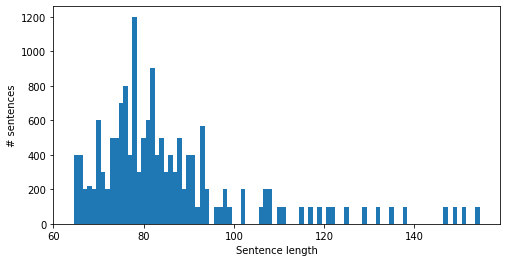

In [40]:
l1 = np.asarray([len(sent) for sents,_ in es_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in es_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [41]:
model_es=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_es)

LSTMTagger_new(
  (_word_embedding): Embedding(38438, 32, padding_idx=38437)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=18, bias=True)
)


In [42]:
model_es.fit(es_dataloader_train,0.01,10)

Epoch 0: 143batch [00:08, 16.49batch/s, accuracy=90.2, loss=0.335]                                                     
Epoch 1: 143batch [00:08, 17.01batch/s, accuracy=94.5, loss=0.18]                                                      
Epoch 2: 143batch [00:08, 17.02batch/s, accuracy=95.8, loss=0.128]                                                     
Epoch 3: 143batch [00:08, 16.69batch/s, accuracy=97.9, loss=0.0633]                                                    
Epoch 4: 143batch [00:09, 15.72batch/s, accuracy=98.3, loss=0.0614]                                                    
Epoch 5: 143batch [00:09, 15.81batch/s, accuracy=98.4, loss=0.0523]                                                    
Epoch 6: 143batch [00:09, 14.72batch/s, accuracy=99, loss=0.0321]                                                      
Epoch 7: 143batch [00:11, 12.51batch/s, accuracy=99.2, loss=0.0316]                                                    
Epoch 8: 143batch [00:12, 11.20batch/s, 

In [43]:
model_es.score(es_dataloader_test)

93.58644241129312

In [44]:
model_es2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_es2)

LSTMTagger_new(
  (_word_embedding): Embedding(38438, 40, padding_idx=38437)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=18, bias=True)
)


In [46]:
model_es2.fit(es_dataloader_train,0.01,10)

Epoch 0: 143batch [00:09, 15.82batch/s, accuracy=91, loss=0.302]                                                       
Epoch 1: 143batch [00:11, 12.50batch/s, accuracy=94.6, loss=0.176]                                                     
Epoch 2: 143batch [00:11, 12.38batch/s, accuracy=96.9, loss=0.104]                                                     
Epoch 3: 143batch [00:11, 12.42batch/s, accuracy=97.7, loss=0.0842]                                                    
Epoch 4: 143batch [00:11, 12.33batch/s, accuracy=98.6, loss=0.0397]                                                    
Epoch 5: 143batch [00:11, 12.30batch/s, accuracy=98.5, loss=0.0482]                                                    
Epoch 6: 143batch [00:12, 11.89batch/s, accuracy=98.7, loss=0.0359]                                                    
Epoch 7: 143batch [00:11, 11.93batch/s, accuracy=99, loss=0.0312]                                                      
Epoch 8: 143batch [00:14, 10.01batch/s, 

In [47]:
model_es2.score(es_dataloader_test)

94.45570591135703

## Load the Korean Corpus

In [ ]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Korean-Kaist/master/ko_kaist-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Korean-Kaist/master/ko_kaist-ud-test.conllu

In [72]:
ko_dataset_train=CorpusDataset("./ko_kaist-ud-train.conllu")
ko_dataset_test=CorpusDataset("./ko_kaist-ud-test.conllu")

In [50]:
print(len(ko_dataset_train))
print(len(ko_dataset_test))
print(ko_dataset_train[0])
print(ko_dataset_test[0])

22965
2285
(['하기야', '짐승도', '잘', '가르치기만', '하면', '어느', '정도는', '순치될', '수', '있다', '.'], ['CCONJ', 'ADV', 'ADV', 'ADV', 'SCONJ', 'DET', 'NOUN', 'VERB', 'NOUN', 'ADJ', 'PUNCT'])
(['이', '조약에', '의해', '영국은', '관세를', '거의', '내지', '않고', '자기', '나라', '상품을', '청에', '팔', '수', '있게', '되었다', '.'], ['DET', 'ADV', 'SCONJ', 'PROPN', 'NOUN', 'ADV', 'VERB', 'CCONJ', 'PRON', 'NOUN', 'NOUN', 'ADV', 'VERB', 'NOUN', 'ADJ', 'AUX', 'PUNCT'])


In [74]:
tokens = {token for sent,_ in ko_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in ko_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

85650
['<UNK>', '늦잠의', '탄압은', '되시기', '마음으로부터', '의미구조에', '로마의', '믿었다', '작가만의', '날이면', '보습들은', '3장으로', '月城', '처지인데', '합격이']
['PROPN', 'SCONJ', 'CCONJ', 'NOUN', 'INTJ', 'ADP', 'PRON', 'ADV', 'NUM', 'X', 'DET', 'VERB', 'PART', 'SYM', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [75]:
ko_dataloader_train=DataLoader(dataset=ko_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
ko_dataloader_test=DataLoader(dataset=ko_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

In [76]:
examples=iter(ko_dataloader_train)
examples2=iter(ko_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([16495, 79404, 51460, 55697, 41298, 19514, 41699, 31938, 24260, 41598,
        62573, 56187, 34724, 53901, 84629, 58430, 85649, 85649, 85649, 85649,
        85649, 85649, 85649, 85649, 85649, 85649])
tensor([ 8,  3,  3,  3,  7,  3,  7,  3,  1,  3,  7, 11,  3,  7, 16, 14, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17])
tensor([24779, 72252, 22567, 55937, 35616,     0, 77040, 46862, 55937, 13662,
        58430, 85649, 85649, 85649, 85649, 85649, 85649, 85649, 85649, 85649,
        85649, 85649, 85649, 85649, 85649, 85649, 85649, 85649])
tensor([ 8,  3,  3,  7,  1,  3, 16,  3,  7, 15, 14, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17])


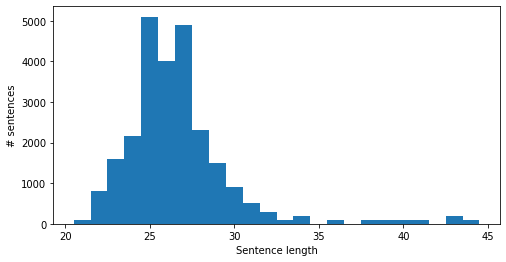

In [53]:
l1 = np.asarray([len(sent) for sents,_ in ko_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in ko_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [54]:
model_ko=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_ko)

LSTMTagger_new(
  (_word_embedding): Embedding(85650, 32, padding_idx=85649)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=17, bias=True)
)


In [56]:
model_ko.fit(ko_dataloader_train,0.01,10)

Epoch 0: 230batch [00:07, 32.69batch/s, accuracy=72.1, loss=0.88]                                                      
Epoch 1: 230batch [00:06, 34.39batch/s, accuracy=80.5, loss=0.618]                                                     
Epoch 2: 230batch [00:06, 33.83batch/s, accuracy=89.5, loss=0.362]                                                     
Epoch 3: 230batch [00:09, 23.93batch/s, accuracy=94.2, loss=0.168]                                                     
Epoch 4: 230batch [00:09, 23.24batch/s, accuracy=96.7, loss=0.106]                                                     
Epoch 5: 230batch [00:09, 23.68batch/s, accuracy=98.4, loss=0.0537]                                                    
Epoch 6: 230batch [00:09, 23.60batch/s, accuracy=98.7, loss=0.045]                                                     
Epoch 7: 230batch [00:09, 23.47batch/s, accuracy=98.2, loss=0.0516]                                                    
Epoch 8: 230batch [00:09, 23.69batch/s, 

In [59]:
model_ko.score(ko_dataloader_test)

70.67907763909457

In [64]:
model_ko2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_ko2)

LSTMTagger_new(
  (_word_embedding): Embedding(85650, 40, padding_idx=85649)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=17, bias=True)
)


In [65]:
model_ko2.fit(ko_dataloader_train,0.01,10)

Epoch 0: 230batch [00:08, 28.18batch/s, accuracy=72.9, loss=0.845]                                                     
Epoch 1: 230batch [00:10, 21.65batch/s, accuracy=84.5, loss=0.509]                                                     
Epoch 2: 230batch [00:10, 22.11batch/s, accuracy=89.9, loss=0.33]                                                      
Epoch 3: 230batch [00:10, 21.01batch/s, accuracy=95.1, loss=0.146]                                                     
Epoch 4: 230batch [00:11, 20.56batch/s, accuracy=97.7, loss=0.0744]                                                    
Epoch 5: 230batch [00:11, 20.04batch/s, accuracy=98.3, loss=0.0599]                                                    
Epoch 6: 230batch [00:14, 15.66batch/s, accuracy=98.8, loss=0.0297]                                                    
Epoch 7: 230batch [00:12, 19.11batch/s, accuracy=99.5, loss=0.0152]                                                    
Epoch 8: 230batch [00:11, 20.27batch/s, 

In [66]:
model_ko2.score(ko_dataloader_test)

76.91277060856075

# Load the Japanese Corpus

In [67]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Japanese-GSD/dev/ja_gsd-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Japanese-GSD/dev/ja_gsd-ud-test.conllu

--2021-05-18 20:56:44--  https://raw.githubusercontent.com/UniversalDependencies/UD_Japanese-GSD/dev/ja_gsd-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27190277 (26M) [text/plain]
Saving to: 'ja_gsd-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 7.59M 3s
    50K .......... .......... .......... .......... ..........  0% 58.8M 2s
   100K .......... .......... .......... .......... ..........  0% 18.4M 2s
   150K .......... .......... .......... .......... ..........  0% 13.2M 2s
   200K .......... .......... .......... .......... ..........  0% 16.6M 2s
   250K .......... .......... .......... .......... ..........  1% 20.3M 2s
   300K .......... .......... .......... .......... ..........  1% 39.2M 2s

  6400K .......... .......... .......... .......... .......... 24%  315M 1s
  6450K .......... .......... .......... .......... .......... 24% 21.3M 1s
  6500K .......... .......... .......... .......... .......... 24%  410M 1s
  6550K .......... .......... .......... .......... .......... 24%  475M 1s
  6600K .......... .......... .......... .......... .......... 25% 18.1M 1s
  6650K .......... .......... .......... .......... .......... 25%  237M 1s
  6700K .......... .......... .......... .......... .......... 25% 67.0M 1s
  6750K .......... .......... .......... .......... .......... 25% 7.53M 1s
  6800K .......... .......... .......... .......... .......... 25%  475M 1s
  6850K .......... .......... .......... .......... .......... 25% 10.2M 1s
  6900K .......... .......... .......... .......... .......... 26%  139M 1s
  6950K .......... .......... .......... .......... .......... 26%  391M 1s
  7000K .......... .......... .......... .......... .......... 26% 9.97M 1s
  7050K ....

--2021-05-18 20:56:46--  https://raw.githubusercontent.com/UniversalDependencies/UD_Japanese-GSD/dev/ja_gsd-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2095913 (2.0M) [text/plain]
Saving to: 'ja_gsd-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  2% 8.90M 0s
    50K .......... .......... .......... .......... ..........  4% 21.1M 0s
   100K .......... .......... .......... .......... ..........  7% 13.3M 0s
   150K .......... .......... .......... .......... ..........  9% 15.7M 0s
   200K .......... .......... .......... .......... .......... 12% 13.2M 0s
   250K .......... .......... .......... .......... .......... 14% 33.6M 0s
   300K .......... .......... .......... .......... .......... 17% 17.6M 0s
 

In [169]:
ja_dataset_train=CorpusDataset("./ja_gsd-ud-train.conllu")
ja_dataset_test=CorpusDataset("./ja_gsd-ud-test.conllu")

print(len(ja_dataset_train))
print(len(ja_dataset_test))
print(ja_dataset_train[0])
print(ja_dataset_test[0])

7045
542
(['ホッケー', 'に', 'は', 'デンジャラス', 'プレー', 'の', '反則', 'が', 'ある', 'の', 'で', '、', '膝', 'より', '上', 'に', 'ボール', 'を', '浮かす', 'こと', 'は', '基本', '的', 'に', '反則', 'に', 'なる', 'が', '、', 'その', '例外', 'の', '一', 'つ', 'が', 'この', 'スクープ', 'で', 'ある', '。'], ['NOUN', 'ADP', 'ADP', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'ADP', 'VERB', 'SCONJ', 'AUX', 'PUNCT', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', 'ADP', 'VERB', 'NOUN', 'ADP', 'NOUN', 'PART', 'AUX', 'NOUN', 'ADP', 'VERB', 'SCONJ', 'PUNCT', 'DET', 'NOUN', 'ADP', 'NUM', 'NOUN', 'ADP', 'DET', 'NOUN', 'AUX', 'VERB', 'PUNCT'])
(['これ', 'に', '不快', '感', 'を', '示す', '住民', 'は', 'い', 'まし', 'た', 'が', ',', '現在', ',', '表立っ', 'て', '反対', 'や', '抗議', 'の', '声', 'を', '挙げ', 'て', 'いる', '住民', 'は', 'い', 'ない', 'よう', 'です', '。'], ['PRON', 'ADP', 'NOUN', 'NOUN', 'ADP', 'VERB', 'NOUN', 'ADP', 'VERB', 'AUX', 'AUX', 'SCONJ', 'PUNCT', 'ADV', 'PUNCT', 'VERB', 'SCONJ', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', 'ADP', 'VERB', 'SCONJ', 'VERB', 'NOUN', 'ADP', 'VERB', 'AUX', 'AUX', 'AUX', 'PUNCT'])


In [170]:
tokens = {token for sent,_ in ja_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in ja_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

ja_dataloader_train=DataLoader(dataset=ja_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
ja_dataloader_test=DataLoader(dataset=ja_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

20177
['<UNK>', '1920', 'リュート', '飲めれ', '南軍', 'みち', '貨幣', 'まんが', 'サティアン', '常世', '抹消', 'スイッチング', '地球', '幅広い', '指す']
['PROPN', 'SCONJ', 'CCONJ', 'NOUN', 'ADP', 'INTJ', 'NUM', 'ADV', 'PRON', 'VERB', 'PART', 'DET', 'SYM', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [171]:
examples=iter(ja_dataloader_train)
examples2=iter(ja_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([16927, 16707, 15286, 16963,   805, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176])
tensor([ 7,  9,  1, 14, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
tensor([ 3348, 14370, 12052, 10001, 13969, 14875, 13969,     0,     0, 15286,
         2031, 12052,  5634, 13982, 14691,    99,  1342,  5634,  1854, 14024,
        10216, 14844, 17197,  5634,     0,  1839, 

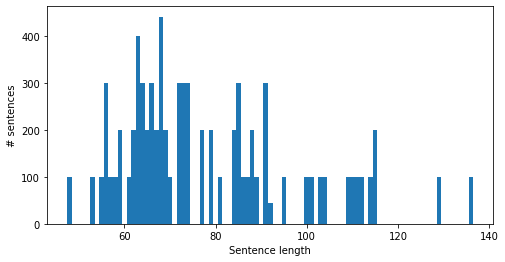

In [172]:
l1 = np.asarray([len(sent) for sents,_ in ja_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in ja_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [173]:
model_ja=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_ja)

LSTMTagger_new(
  (_word_embedding): Embedding(20177, 32, padding_idx=20176)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=16, bias=True)
)


In [174]:
model_ja.fit(ja_dataloader_train,0.01,10)

Epoch 0: 71batch [00:03, 17.86batch/s, accuracy=84.8, loss=0.515]                                                      
Epoch 1: 71batch [00:04, 16.08batch/s, accuracy=90.2, loss=0.33]                                                       
Epoch 2: 71batch [00:04, 16.13batch/s, accuracy=93.8, loss=0.186]                                                      
Epoch 3: 71batch [00:04, 16.20batch/s, accuracy=94.4, loss=0.16]                                                       
Epoch 4: 71batch [00:04, 16.21batch/s, accuracy=96.9, loss=0.102]                                                      
Epoch 5: 71batch [00:04, 16.18batch/s, accuracy=96.7, loss=0.105]                                                      
Epoch 6: 71batch [00:04, 16.34batch/s, accuracy=98.5, loss=0.0603]                                                     
Epoch 7: 71batch [00:04, 15.93batch/s, accuracy=99, loss=0.0303]                                                       
Epoch 8: 71batch [00:04, 16.06batch/s, a

In [175]:
model_ja.score(ja_dataloader_test)

92.67188459177409

In [176]:
model_ja2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_ja2)

LSTMTagger_new(
  (_word_embedding): Embedding(20177, 40, padding_idx=20176)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=16, bias=True)
)


In [177]:
model_ja2.fit(ja_dataloader_train,0.01,10)

Epoch 0: 71batch [00:03, 20.40batch/s, accuracy=85.3, loss=0.46]                                                       
Epoch 1: 71batch [00:04, 15.49batch/s, accuracy=90.8, loss=0.296]                                                      
Epoch 2: 71batch [00:04, 15.30batch/s, accuracy=95, loss=0.159]                                                        
Epoch 3: 71batch [00:04, 15.40batch/s, accuracy=95, loss=0.144]                                                        
Epoch 4: 71batch [00:04, 15.43batch/s, accuracy=97.1, loss=0.0876]                                                     
Epoch 5: 71batch [00:04, 15.53batch/s, accuracy=98.2, loss=0.054]                                                      
Epoch 6: 71batch [00:04, 15.49batch/s, accuracy=98.7, loss=0.0414]                                                     
Epoch 7: 71batch [00:04, 15.26batch/s, accuracy=98.6, loss=0.0318]                                                     
Epoch 8: 71batch [00:04, 15.21batch/s, a

In [178]:
model_ja2.score(ja_dataloader_test)

92.84069981583794

## Load the Swedish Corpus

In [96]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-Talbanken/dev/sv_talbanken-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-Talbanken/dev/sv_talbanken-ud-test.conllu

--2021-05-18 21:29:30--  https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-Talbanken/dev/sv_talbanken-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5839640 (5.6M) [text/plain]
Saving to: 'sv_talbanken-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 8.39M 1s
    50K .......... .......... .......... .......... ..........  1% 23.9M 0s
   100K .......... .......... .......... .......... ..........  2% 22.8M 0s
   150K .......... .......... .......... .......... ..........  3% 11.3M 0s
   200K .......... .......... .......... .......... ..........  4% 33.5M 0s
   250K .......... .......... .......... .......... ..........  5% 4.10M 0s
   300K .......... .......... .......... .......... ......

--2021-05-18 21:29:31--  https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-Talbanken/dev/sv_talbanken-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1781482 (1.7M) [text/plain]
Saving to: 'sv_talbanken-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  2% 10.3M 0s
    50K .......... .......... .......... .......... ..........  5% 16.3M 0s
   100K .......... .......... .......... .......... ..........  8% 20.5M 0s
   150K .......... .......... .......... .......... .......... 11% 21.3M 0s
   200K .......... .......... .......... .......... .......... 14% 11.9M 0s
   250K .......... .......... .......... .......... .......... 17% 29.2M 0s
   300K .......... .......... .......... .......... ........

In [97]:
sv_dataset_train=CorpusDataset("./sv_talbanken-ud-train.conllu")
sv_dataset_test=CorpusDataset("./sv_talbanken-ud-test.conllu")

print(len(sv_dataset_train))
print(len(sv_dataset_test))
print(sv_dataset_train[0])
print(sv_dataset_test[0])

4166
1184
(['Individuell', 'beskattning', 'av', 'arbetsinkomster'], ['ADJ', 'NOUN', 'ADP', 'NOUN'])
(['Den', 'allmänna', 'pensionen', 'är', 'av', 'två', 'slag', ':', 'folkpension', 'och', 'tilläggspension', '(', 'ATP', ')', '.'], ['DET', 'ADJ', 'NOUN', 'AUX', 'ADP', 'NUM', 'NOUN', 'PUNCT', 'NOUN', 'CCONJ', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'PUNCT'])


In [98]:
tokens = {token for sent,_ in sv_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in sv_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

sv_dataloader_train=DataLoader(dataset=sv_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
sv_dataloader_test=DataLoader(dataset=sv_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

12810
['<UNK>', 'Expressutdelning', 'Totala', 'mängdläran', 'förändrad', 'avge', 'skalaren', 'sannerligen', 'pappa-roll', 'dubbla', 'graviditeter', 'Ministerrådssekretariatet', 'gentemot', 'största', 'rissorterna']
['PROPN', 'SCONJ', 'CCONJ', 'NOUN', 'ADP', 'INTJ', 'PRON', 'ADV', 'NUM', 'VERB', 'PART', 'DET', 'SYM', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [99]:
examples=iter(sv_dataloader_train)
examples2=iter(sv_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([  482,  9311, 10993,   964,  2827, 11246,  2928,  2835,  9727,  2827,
        11699, 11866, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809,
        12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809,
        12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809,
        12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809,
        12809, 12809, 12809, 12809])
tensor([ 9,  7,  4,  0, 13,  3,  2,  3,  3, 13,  8,  0, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
tensor([  114,  5398,  8441,  9795,  8063,  9716,  1256,  2070,  8351, 11521,
         9143,  5714, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809,
        12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809,
        12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809, 12809,
        12809, 12809

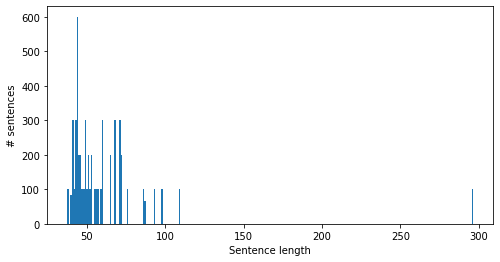

In [100]:
l1 = np.asarray([len(sent) for sents,_ in sv_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in sv_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [101]:
model_sv=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_sv)

LSTMTagger_new(
  (_word_embedding): Embedding(12810, 32, padding_idx=12809)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=16, bias=True)
)


In [102]:
model_sv.fit(sv_dataloader_train,0.01,10)

Epoch 0: 42batch [00:01, 26.10batch/s, accuracy=68.6, loss=0.972]                                                      
Epoch 1: 42batch [00:01, 30.32batch/s, accuracy=78.2, loss=0.636]                                                      
Epoch 2: 42batch [00:01, 30.52batch/s, accuracy=90, loss=0.339]                                                        
Epoch 3: 42batch [00:01, 30.08batch/s, accuracy=91, loss=0.299]                                                        
Epoch 4: 42batch [00:01, 30.63batch/s, accuracy=92.8, loss=0.217]                                                      
Epoch 5: 42batch [00:01, 30.18batch/s, accuracy=95.8, loss=0.144]                                                      
Epoch 6: 42batch [00:01, 30.81batch/s, accuracy=97.5, loss=0.0908]                                                     
Epoch 7: 42batch [00:01, 30.36batch/s, accuracy=98.2, loss=0.0666]                                                     
Epoch 8: 42batch [00:01, 30.57batch/s, a

In [103]:
model_sv.score(sv_dataloader_test)

85.8175204011405

In [104]:
model_sv2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_sv2)

LSTMTagger_new(
  (_word_embedding): Embedding(12810, 40, padding_idx=12809)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=16, bias=True)
)


In [105]:
model_sv2.fit(sv_dataloader_train,0.01,10)

Epoch 0: 42batch [00:01, 28.93batch/s, accuracy=67.6, loss=0.944]                                                      
Epoch 1: 42batch [00:01, 29.08batch/s, accuracy=78.2, loss=0.663]                                                      
Epoch 2: 42batch [00:01, 28.88batch/s, accuracy=87.5, loss=0.378]                                                      
Epoch 3: 42batch [00:01, 27.42batch/s, accuracy=92.3, loss=0.254]                                                      
Epoch 4: 42batch [00:01, 21.13batch/s, accuracy=95.6, loss=0.144]                                                      
Epoch 5: 42batch [00:02, 20.42batch/s, accuracy=96.4, loss=0.113]                                                      
Epoch 6: 42batch [00:02, 20.09batch/s, accuracy=97.8, loss=0.0775]                                                     
Epoch 7: 42batch [00:02, 19.29batch/s, accuracy=98.5, loss=0.0545]                                                     
Epoch 8: 42batch [00:02, 18.74batch/s, a

In [106]:
model_sv2.score(sv_dataloader_test)

86.43201258479992

## Load the Hungarian Corpus

In [109]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Hungarian-Szeged/master/hu_szeged-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Hungarian-Szeged/master/hu_szeged-ud-test.conllu

--2021-05-18 21:39:47--  https://raw.githubusercontent.com/UniversalDependencies/UD_Hungarian-Szeged/master/hu_szeged-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457523 (1.4M) [text/plain]
Saving to: 'hu_szeged-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  3% 9.20M 0s
    50K .......... .......... .......... .......... ..........  7% 26.2M 0s
   100K .......... .......... .......... .......... .......... 10% 12.1M 0s
   150K .......... .......... .......... .......... .......... 14% 17.3M 0s
   200K .......... .......... .......... .......... .......... 17% 21.6M 0s
   250K .......... .......... .......... .......... .......... 21% 15.0M 0s
   300K .......... .......... .......... .......... ..........

In [110]:
hu_dataset_train=CorpusDataset("./hu_szeged-ud-train.conllu")
hu_dataset_test=CorpusDataset("./hu_szeged-ud-test.conllu")

print(len(hu_dataset_train))
print(len(hu_dataset_test))
print(hu_dataset_train[0])
print(hu_dataset_test[0])

908
449
(['A', 'világban', 'immár', 'tíz', 'éve', 'tartó', 'folyamatos', 'gazdasági', 'fellendülés', 'minden', 'eddigi', 'konjunktúra-időszaknál', 'hosszabb', '.'], ['DET', 'NOUN', 'ADV', 'NUM', 'NOUN', 'ADJ', 'ADJ', 'ADJ', 'NOUN', 'DET', 'ADJ', 'NOUN', 'ADJ', 'PUNCT'])
(['Az', 'ezredfordulós', 'szilveszter', 'valószínűleg', 'az', 'átlagos', 'év', 'véginél', 'komolyabb', 'feladatokat', 'ró', 'a', 'sürgősségi', 'betegellátás', 'szervezeteire', 'és', 'a', 'rendőrségre', '.'], ['DET', 'ADJ', 'NOUN', 'ADV', 'DET', 'ADJ', 'NOUN', 'ADJ', 'ADJ', 'NOUN', 'VERB', 'DET', 'ADJ', 'NOUN', 'NOUN', 'CCONJ', 'DET', 'NOUN', 'PUNCT'])


In [111]:
tokens = {token for sent,_ in hu_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in hu_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

hu_dataloader_train=DataLoader(dataset=hu_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
hu_dataloader_test=DataLoader(dataset=hu_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

7767
['<UNK>', 'egyesületi', 'bevallotta', 'magától', 'februárjában', 'nehezen', 'elmondták', 'országnak', 'megpróbáltatásairól', 'éjjel', 'története', 'javaslatokat', 'nyitottak', 'besúgók', 'látott']
['PROPN', 'SCONJ', 'CCONJ', 'NOUN', 'ADP', 'INTJ', 'NUM', 'ADV', 'PRON', 'X', 'DET', 'VERB', 'PART', 'PUNCT', 'AUX', 'ADJ', '<PAD>']


In [112]:
examples=iter(hu_dataloader_train)
examples2=iter(hu_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([ 307, 6409, 1696, 1356, 4734, 7011, 2514, 6653, 3017, 1356, 2555, 2288,
        6405,  780,  344, 5362, 6283, 1696, 5027, 4162, 7279, 7001,  584, 3456,
        7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766,
        7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766,
        7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766,
        7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766, 7766,
        7766, 7766, 7766, 7766, 7766])
tensor([ 0,  0, 13, 10, 15, 15,  3,  3,  4, 10, 15, 15,  3,  6,  6,  3, 14, 13,
         8,  6, 15,  3, 11, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16])
tensor([ 409, 7331, 3865,   43, 5053, 7572,    0,    0, 1356,    0,    0, 1221,
        7766, 7766, 7766, 7766, 7766, 7766, 7766, 77

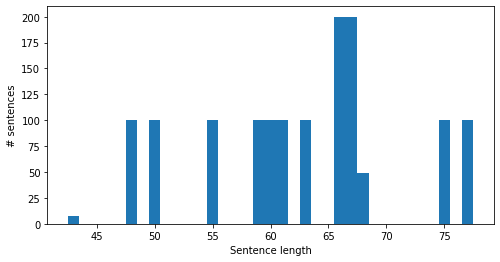

In [113]:
l1 = np.asarray([len(sent) for sents,_ in hu_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in hu_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [114]:
model_hu=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_hu)

LSTMTagger_new(
  (_word_embedding): Embedding(7767, 32, padding_idx=7766)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=16, bias=True)
)


In [115]:
model_hu.fit(hu_dataloader_train,0.01,10)

Epoch 0: 10batch [00:00, 16.26batch/s, accuracy=49.4, loss=1.78]                                                       
Epoch 1: 10batch [00:00, 26.61batch/s, accuracy=51.8, loss=1.52]                                                       
Epoch 2: 10batch [00:00, 26.03batch/s, accuracy=57.1, loss=1.28]                                                       
Epoch 3: 10batch [00:00, 26.70batch/s, accuracy=56.8, loss=1.31]                                                       
Epoch 4: 10batch [00:00, 26.59batch/s, accuracy=67.5, loss=1.02]                                                       
Epoch 5: 10batch [00:00, 26.07batch/s, accuracy=76.9, loss=0.81]                                                       
Epoch 6: 10batch [00:00, 25.91batch/s, accuracy=76.8, loss=0.751]                                                      
Epoch 7: 10batch [00:00, 25.98batch/s, accuracy=76.5, loss=0.713]                                                      
Epoch 8: 10batch [00:00, 26.29batch/s, a

In [116]:
model_hu.score(hu_dataloader_test)

71.87978560490046

In [121]:
model_hu2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_hu2)

LSTMTagger_new(
  (_word_embedding): Embedding(7767, 40, padding_idx=7766)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=16, bias=True)
)


In [122]:
model_hu2.fit(hu_dataloader_train,0.01,10)

Epoch 0: 10batch [00:00, 24.87batch/s, accuracy=41.1, loss=1.86]                                                       
Epoch 1: 10batch [00:00, 24.83batch/s, accuracy=59.5, loss=1.26]                                                       
Epoch 2: 10batch [00:00, 25.42batch/s, accuracy=58.7, loss=1.16]                                                       
Epoch 3: 10batch [00:00, 24.91batch/s, accuracy=63.4, loss=1.05]                                                       
Epoch 4: 10batch [00:00, 24.89batch/s, accuracy=69.2, loss=0.918]                                                      
Epoch 5: 10batch [00:00, 25.29batch/s, accuracy=76.9, loss=0.684]                                                      
Epoch 6: 10batch [00:00, 24.90batch/s, accuracy=80.9, loss=0.655]                                                      
Epoch 7: 10batch [00:00, 25.20batch/s, accuracy=94.9, loss=0.217]                                                      
Epoch 8: 10batch [00:00, 25.27batch/s, a

In [123]:
model_hu2.score(hu_dataloader_test)

72.12863705972435

# Load the Hebrew Corpus

In [253]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Hebrew-HTB/dev/he_htb-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Hebrew-HTB/dev/he_htb-ud-test.conllu

--2021-05-18 23:04:31--  https://raw.githubusercontent.com/UniversalDependencies/UD_Hebrew-HTB/dev/he_htb-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10403144 (9.9M) [text/plain]
Saving to: 'he_htb-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 9.36M 1s
    50K .......... .......... .......... .......... ..........  0% 15.2M 1s
   100K .......... .......... .......... .......... ..........  1% 19.4M 1s
   150K .......... .......... .......... .......... ..........  1% 21.7M 1s
   200K .......... .......... .......... .......... ..........  2% 13.5M 1s
   250K .......... .......... .......... .......... ..........  2% 16.9M 1s
   300K .......... .......... .......... .......... ..........  3% 15.6M 1s


--2021-05-18 23:04:32--  https://raw.githubusercontent.com/UniversalDependencies/UD_Hebrew-HTB/dev/he_htb-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 931163 (909K) [text/plain]
Saving to: 'he_htb-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  5% 9.20M 0s
    50K .......... .......... .......... .......... .......... 10% 26.6M 0s
   100K .......... .......... .......... .......... .......... 16% 12.7M 0s
   150K .......... .......... .......... .......... .......... 21% 16.9M 0s
   200K .......... .......... .......... .......... .......... 27% 30.7M 0s
   250K .......... .......... .......... .......... .......... 32% 9.29M 0s
   300K .......... .......... .......... .......... .......... 38% 13.6M 0s
   3

In [5]:
he_dataset_train=CorpusDataset("./he_htb-ud-train.conllu")
he_dataset_test=CorpusDataset("./he_htb-ud-test.conllu")

print(len(he_dataset_train))
print(len(he_dataset_test))
print(he_dataset_train[0])
print(he_dataset_test[0])

5222
490
(['הקהל', 'ה', 'קהל', 'איתר', 'סוף', 'סוף', 'ערבי', 'ויהודים', 'ו', 'יהודים', 'חבטו', 'בו', 'ב_', '_הוא', 'עד', 'זוב', 'דם', '.'], [None, 'DET', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'NOUN', None, 'CCONJ', 'NOUN', 'VERB', None, 'ADP', 'PRON', 'ADP', 'NOUN', 'NOUN', 'PUNCT'])
(['הולקומב', 'לא', 'הזכיר', 'את', 'יכולתו', 'יכולת_', '_של_', '_הוא', ',', 'קרטר', 'וסמית', 'ו', 'סמית', 'שהיו', 'ש', 'היו', 'אמורים', 'לעזור', 'בריבאונד', 'ב', 'ריבאונד', ',', 'נתקלו', 'בקמבל', 'ב', 'קמבל', 'ובורמור', 'ו', 'בורמור', 'שקטפו', 'ש', 'קטפו', 'את', 'מרבית', 'הכדורים', 'ה', 'כדורים', 'החוזרים', 'ה', 'חוזרים', 'עובדה', 'שאיפשרה', 'ש', 'איפשרה', 'לגליל', 'ל', 'ה_', 'גליל', 'לצאת', 'להתקפות', 'ל', 'התקפות', 'מתפרצות', 'בורמור', 'הוביל', ',', 'גורדון', 'ומטלון', 'ו', 'מטלון', 'סיימו', 'במרבית', 'ב', 'מרבית', 'המקרים', 'ה', 'מקרים', 'בסל', 'ב', 'סל', '.'], ['PROPN', 'ADV', 'VERB', 'ADP', None, 'NOUN', 'ADP', 'PRON', 'PUNCT', 'PROPN', None, 'CCONJ', 'PROPN', None, 'SCONJ', 'AUX', 'AUX', 'VERB', None, 'ADP'

In [6]:
tokens = {token for sent,_ in he_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in he_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

he_dataloader_train=DataLoader(dataset=he_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
he_dataloader_test=DataLoader(dataset=he_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

29667
['<UNK>', 'המתרחשים', 'הווריאציה', 'כמעט', 'הקודמות', 'ריח', 'ויידנפלד', 'וחירונה', 'פרדסנות', 'שבר_', 'אלף', 'שהכילה', 'וממשלת', 'היווניות', 'לכניעת']
['ADJ', 'VERB', 'NOUN', 'PROPN', 'X', 'SCONJ', None, 'PRON', 'NUM', 'INTJ', 'DET', 'CCONJ', 'PUNCT', 'ADV', 'ADP', 'AUX', '<PAD>']


In [7]:
examples=iter(he_dataloader_train)
examples2=iter(he_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([ 7571,  6037, 16655, 17131,  1693,  5569, 29086, 27248, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29666,
        29666, 29666, 29666])
tensor([ 6, 10,  2,  1,  6, 11,  1, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 

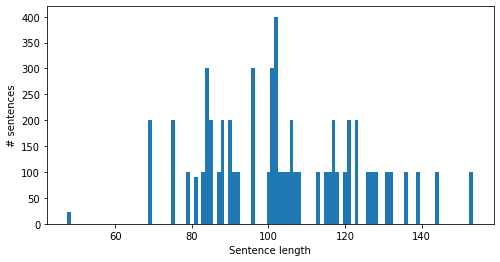

In [8]:
l1 = np.asarray([len(sent) for sents,_ in he_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in he_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [11]:
model_he=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_he) 

LSTMTagger_new(
  (_word_embedding): Embedding(29667, 32, padding_idx=29666)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=16, bias=True)
)


In [12]:
model_he.fit(he_dataloader_train,0.01,10) 

Epoch 0: 53batch [00:04, 13.21batch/s, accuracy=70.4, loss=0.889]                                                      
Epoch 1: 53batch [00:05, 10.18batch/s, accuracy=85.5, loss=0.446]                                                      
Epoch 2: 53batch [00:04, 11.40batch/s, accuracy=89.5, loss=0.327]                                                      
Epoch 3: 53batch [00:04, 11.19batch/s, accuracy=97.3, loss=0.125]                                                      
Epoch 4: 53batch [00:04, 11.35batch/s, accuracy=97.6, loss=0.0965]                                                     
Epoch 5: 53batch [00:04, 11.51batch/s, accuracy=97.3, loss=0.0916]                                                     
Epoch 6: 53batch [00:04, 11.56batch/s, accuracy=98.9, loss=0.0473]                                                     
Epoch 7: 53batch [00:04, 11.73batch/s, accuracy=99.1, loss=0.0313]                                                     
Epoch 8: 53batch [00:04, 11.50batch/s, a

In [13]:
model_he.score(he_dataloader_test)

85.53492367673297

In [14]:
model_he2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_he2)

LSTMTagger_new(
  (_word_embedding): Embedding(29667, 40, padding_idx=29666)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=16, bias=True)
)


In [15]:
model_he2.fit(he_dataloader_train,0.01,10)

Epoch 0: 53batch [00:03, 14.92batch/s, accuracy=74.9, loss=0.748]                                                      
Epoch 1: 53batch [00:04, 11.05batch/s, accuracy=83.7, loss=0.502]                                                      
Epoch 2: 53batch [00:05, 10.22batch/s, accuracy=91.3, loss=0.34]                                                       
Epoch 3: 53batch [00:04, 10.82batch/s, accuracy=96.8, loss=0.12]                                                       
Epoch 4: 53batch [00:04, 10.76batch/s, accuracy=96.8, loss=0.099]                                                      
Epoch 5: 53batch [00:05, 10.28batch/s, accuracy=98.1, loss=0.0726]                                                     
Epoch 6: 53batch [00:04, 10.76batch/s, accuracy=99, loss=0.0529]                                                       
Epoch 7: 53batch [00:04, 11.13batch/s, accuracy=98.9, loss=0.037]                                                      
Epoch 8: 53batch [00:04, 11.02batch/s, a

In [16]:
model_he2.score(he_dataloader_test)

88.44908478160312

## Load the Hindi Corpus

In [1]:
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Hindi-HDTB/master/hi_hdtb-ud-train.conllu
!wget -N https://raw.githubusercontent.com/UniversalDependencies/UD_Hindi-HDTB/master/hi_hdtb-ud-test.conllu

--2021-05-19 13:18:42--  https://raw.githubusercontent.com/UniversalDependencies/UD_Hindi-HDTB/master/hi_hdtb-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41227921 (39M) [text/plain]
Saving to: 'hi_hdtb-ud-train.conllu'

     0K .......... .......... .......... .......... ..........  0% 9.65M 4s
    50K .......... .......... .......... .......... ..........  0%  101M 2s
   100K .......... .......... .......... .......... ..........  0% 14.5M 2s
   150K .......... .......... .......... .......... ..........  0% 11.0M 3s
   200K .......... .......... .......... .......... ..........  0% 16.1M 3s
   250K .......... .......... .......... .......... ..........  0% 24.7M 2s
   300K .......... .......... .......... .......... ..........  0% 14.3M

--2021-05-19 13:18:45--  https://raw.githubusercontent.com/UniversalDependencies/UD_Hindi-HDTB/master/hi_hdtb-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5180998 (4.9M) [text/plain]
Saving to: 'hi_hdtb-ud-test.conllu'

     0K .......... .......... .......... .......... ..........  0% 10.1M 0s
    50K .......... .......... .......... .......... ..........  1% 34.1M 0s
   100K .......... .......... .......... .......... ..........  2% 14.1M 0s
   150K .......... .......... .......... .......... ..........  3% 29.8M 0s
   200K .......... .......... .......... .......... ..........  4% 10.7M 0s
   250K .......... .......... .......... .......... ..........  5% 17.5M 0s
   300K .......... .......... .......... .......... ..........  6% 39.4M 0

In [58]:
hi_dataset_train=CorpusDataset("./hi_hdtb-ud-train.conllu")
hi_dataset_test=CorpusDataset("./hi_hdtb-ud-test.conllu")

print(len(hi_dataset_train))
print(len(hi_dataset_test))
print(hi_dataset_train[0])
print(hi_dataset_test[0])

13302
1684
(['यह', 'एशिया', 'की', 'सबसे', 'बड़ी', 'मस्जिदों', 'में', 'से', 'एक', 'है', '।'], ['DET', 'PROPN', 'ADP', 'ADV', 'ADJ', 'NOUN', 'ADP', 'ADP', 'NUM', 'AUX', 'PUNCT'])
(['इसके', 'अतिरिक्त', 'गुग्गुल', 'कुंड', ',', 'भीम', 'गुफा', 'तथा', 'भीमशिला', 'भी', 'दर्शनीय', 'स्थल', 'हैं', '।'], ['PRON', 'ADP', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PROPN', 'CCONJ', 'PROPN', 'PART', 'ADJ', 'NOUN', 'AUX', 'PUNCT'])


In [59]:
tokens = {token for sent,_ in hi_dataset_train for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in hi_dataset_train for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)

hi_dataloader_train=DataLoader(dataset=hi_dataset_train,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
hi_dataloader_test=DataLoader(dataset=hi_dataset_test,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

16881
['<UNK>', '१.७४', '५३०', 'बुद्धदेव', 'बीएससी', 'सुप्रीमकोर्ट', 'फूलों', 'डोना', 'कैफे', 'फिरोज', 'खिलाफत', 'नोटिस', '५.६', 'वायुसैनिकों', 'कव्वाली']
['ADJ', 'VERB', 'PART', 'NOUN', 'PROPN', 'X', 'SCONJ', 'PRON', 'NUM', 'INTJ', 'DET', 'PUNCT', 'CCONJ', 'ADV', 'ADP', 'AUX', '<PAD>']


In [60]:
examples=iter(hi_dataloader_train)
examples2=iter(hi_dataloader_test)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([ 6634,   811, 12395,  1215,  7515,  6661,  5925,  1694,  7887, 16880,
        16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880,
        16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880,
        16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880,
        16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880,
        16880])
tensor([10,  3, 10,  0,  3, 14,  1, 15, 11, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
tensor([ 9798,  1694, 12757,  6627,     0,  6062,  8923, 16481,  6504,     0,
        14073,  3902,  4282, 14584,     0, 15676,  2236, 13942,  6217, 15491,
         1188,  4796,  7887, 16880, 16880, 16880, 16880, 16880, 16880, 16880,
        16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880,
        16880, 16880, 16880, 16880, 16880, 16880, 168

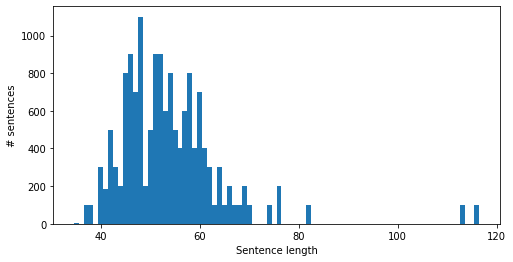

In [61]:
l1 = np.asarray([len(sent) for sents,_ in hi_dataloader_train for sent in sents], dtype=np.int32)
l2 = np.asarray([len(sent) for sents,_ in hi_dataloader_test for sent in sents], dtype=np.int32)
l3 = np.append(l1,l2)
plt.figure(figsize=(8, 4))
x = np.unique(l3)
plt.bar(x, [np.sum(l3==e) for e in x], width=1)
plt.xlabel("Sentence length")
plt.ylabel("# sentences") 
plt.show()

In [36]:
model_hi=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_hi) 

LSTMTagger_new(
  (_word_embedding): Embedding(16881, 32, padding_idx=16880)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=16, bias=True)
)


In [37]:
model_hi.fit(hi_dataloader_train,0.01,10) 

Epoch 0: 134batch [00:07, 18.32batch/s, accuracy=100, loss=0.0836]                                                     
Epoch 1: 134batch [00:07, 17.93batch/s, accuracy=90.2, loss=0.321]                                                     
Epoch 2: 134batch [00:07, 17.97batch/s, accuracy=100, loss=0.0661]                                                     
Epoch 3: 134batch [00:07, 17.96batch/s, accuracy=98.2, loss=0.0624]                                                    
Epoch 4: 134batch [00:07, 17.83batch/s, accuracy=98.1, loss=0.0634]                                                    
Epoch 5: 134batch [00:07, 17.99batch/s, accuracy=100, loss=0.0592]                                                     
Epoch 6: 134batch [00:07, 17.95batch/s, accuracy=100, loss=0.0302]                                                     
Epoch 7: 134batch [00:07, 17.64batch/s, accuracy=100, loss=0.0214]                                                     
Epoch 8: 134batch [00:08, 16.33batch/s, 

In [38]:
model_hi.score(hi_dataloader_test)

93.53090601185437

In [39]:
model_hi2=LSTMTagger_new(word_embedding_dim=40,                                       
                   lstm_hidden_dim=80,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_hi2) 

LSTMTagger_new(
  (_word_embedding): Embedding(16881, 40, padding_idx=16880)
  (_lstm): LSTM(40, 80, batch_first=True)
  (_fc): Linear(in_features=80, out_features=16, bias=True)
)


In [40]:
model_hi2.fit(hi_dataloader_train,0.01,10) 

Epoch 0: 134batch [00:07, 18.66batch/s, accuracy=96.7, loss=0.167]                                                     
Epoch 1: 134batch [00:08, 16.35batch/s, accuracy=96.8, loss=0.118]                                                     
Epoch 2: 134batch [00:08, 15.57batch/s, accuracy=98.7, loss=0.0606]                                                    
Epoch 3: 134batch [00:07, 17.13batch/s, accuracy=97.4, loss=0.215]                                                     
Epoch 4: 134batch [00:07, 17.29batch/s, accuracy=100, loss=0.00539]                                                    
Epoch 5: 134batch [00:07, 17.29batch/s, accuracy=95.7, loss=0.0622]                                                    
Epoch 6: 134batch [00:07, 17.37batch/s, accuracy=90.5, loss=0.284]                                                     
Epoch 7: 134batch [00:07, 17.37batch/s, accuracy=93.8, loss=0.191]                                                     
Epoch 8: 134batch [00:07, 17.32batch/s, 

In [41]:
model_hi2.score(hi_dataloader_test)

91.65678803274061

## Extension 8  Compare the Performance of Japanese Corpus with UD tag sets  to it with Japanese specific tag sets
If I wanna load the  Corpus with its specific tagsets then I need a new dataset class to parse the xpos tag items where stores Japanese specific tag sets

In [5]:
class CorpusDataset2(Dataset):

    def __init__(self,source):
        conll =pyconll.load_from_file(source) # load the whole data
        conll=[sentence for sentence in conll if len(sentence)>2] #remove the short sentences
        self.x=[[word.form for word in sentence] for sentence in conll] #get the list of tokens
        self.y=[[word.xpos for word in sentence] for sentence in conll] #get the list of tags
        self.n_samples=len(conll)
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_samples

In [12]:
ja_dataset_train2=CorpusDataset2("./ja_gsd-ud-train.conllu")
ja_dataset_test2=CorpusDataset2("./ja_gsd-ud-test.conllu")

print(len(ja_dataset_train2))
print(len(ja_dataset_test2))
print(ja_dataset_train2[0])
print(ja_dataset_test2[0])

7045
542
(['ホッケー', 'に', 'は', 'デンジャラス', 'プレー', 'の', '反則', 'が', 'ある', 'の', 'で', '、', '膝', 'より', '上', 'に', 'ボール', 'を', '浮かす', 'こと', 'は', '基本', '的', 'に', '反則', 'に', 'なる', 'が', '、', 'その', '例外', 'の', '一', 'つ', 'が', 'この', 'スクープ', 'で', 'ある', '。'], ['名詞-普通名詞-一般', '助詞-格助詞', '助詞-係助詞', '名詞-普通名詞-一般', '名詞-普通名詞-サ変可能', '助詞-格助詞', '名詞-普通名詞-サ変可能', '助詞-格助詞', '動詞-非自立可能', '助詞-準体助詞', '助動詞', '補助記号-読点', '名詞-普通名詞-一般', '助詞-格助詞', '名詞-普通名詞-副詞可能', '助詞-格助詞', '名詞-普通名詞-一般', '助詞-格助詞', '動詞-一般', '名詞-普通名詞-一般', '助詞-係助詞', '名詞-普通名詞-一般', '接尾辞-形状詞的', '助動詞', '名詞-普通名詞-サ変可能', '助詞-格助詞', '動詞-非自立可能', '助詞-接続助詞', '補助記号-読点', '連体詞', '名詞-普通名詞-一般', '助詞-格助詞', '名詞-数詞', '接尾辞-名詞的-助数詞', '助詞-格助詞', '連体詞', '名詞-普通名詞-サ変可能', '助動詞', '動詞-非自立可能', '補助記号-句点'])
(['これ', 'に', '不快', '感', 'を', '示す', '住民', 'は', 'い', 'まし', 'た', 'が', ',', '現在', ',', '表立っ', 'て', '反対', 'や', '抗議', 'の', '声', 'を', '挙げ', 'て', 'いる', '住民', 'は', 'い', 'ない', 'よう', 'です', '。'], ['代名詞', '助詞-格助詞', '名詞-普通名詞-形状詞可能', '名詞-普通名詞-一般', '助詞-格助詞', '動詞-一般', '名詞-普通名詞-一般', '助詞-係助詞', '動詞-非自立可能', '助動詞', '助動詞

In [13]:
tokens = {token for sent,_ in ja_dataset_train2 for token in sent}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for _,label in ja_dataset_train2 for tag in label}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(len(idx2token))
print(idx2token[:15])
print(idx2tag)


ja_dataloader_train2=DataLoader(dataset=ja_dataset_train2,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)
ja_dataloader_test2=DataLoader(dataset=ja_dataset_test2,batch_size=100,shuffle=True,num_workers=0,collate_fn=pad_and_encode)

20177
['<UNK>', '行ける', 'オープン', '小柄', '多賀', '恐れる', 'シンプル', 'コーヒー', 'こげ', '傭兵', '該当', 'オフコン', '膨大', '六合', 'インター']
['接尾辞-形状詞的', '名詞-普通名詞-一般', '名詞-普通名詞-副詞可能', '接尾辞-名詞的-副詞可能', '名詞-固有名詞-地名-国', '形状詞-助動詞語幹', '名詞-固有名詞-人名-名', '形状詞-一般', '代名詞', '補助記号-読点', '助詞-接続助詞', '名詞-数詞', '副詞', '助動詞', '名詞-普通名詞-形状詞可能', '名詞-固有名詞-人名-姓', '形容詞-非自立可能', '接尾辞-形容詞的', '記号-文字', '助詞-副助詞', '感動詞-フィラー', '名詞-固有名詞-一般', '補助記号-括弧開', '動詞-一般', '接尾辞-名詞的-サ変可能', '形状詞-タリ', '補助記号-括弧閉', '接続詞', '形容詞-一般', '名詞-助動詞語幹', '接尾辞-動詞的', '助詞-係助詞', '接尾辞-名詞的-一般', '連体詞', '接尾辞-名詞的-助数詞', '名詞-普通名詞-サ変形状詞可能', '名詞-普通名詞-助数詞可能', '絵文字・記号等', '接頭辞', '動詞-非自立可能', '感動詞-一般', '外国語', '名詞-固有名詞-人名-一般', '名詞-普通名詞-サ変可能', '記号-一般', '補助記号-一般', '助詞-格助詞', '補助記号-句点', '名詞-固有名詞-地名-一般', '助詞-終助詞', '助詞-準体助詞', '<PAD>']


In [16]:
examples=iter(ja_dataloader_train2)
examples2=iter(ja_dataloader_test2)
sents,labels=examples.next()
sents2,labels2=examples2.next()
assert len(sents)==len(labels)
assert len(sents2)==len(labels2)
batch_size=len(sents)
print(sents[0])
print(labels[0])
print(sents2[0])
print(labels2[0])

tensor([ 3111,  8122,  2254,   424, 19567,  8293, 12242,  7390,  1696,  3468,
        19106,  9970,  7712, 14398,  3144, 10258,  7969, 16122,  7991,  7240,
         9851, 10258,  8582,  7890, 14398,  2298, 10258,  6629,  1373, 14077,
         3144, 10258,  7969,  1318, 14398,  2298, 10258, 15556,  1373, 14077,
        11485, 12845, 14628, 12242, 18972,  6034, 14628, 13106, 19106, 15438,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176, 20176,
        20176, 20176, 20176, 20176])
tensor([11, 36, 46,  4,  1, 46, 43, 46, 43, 39, 13,  1, 32, 13,  9, 18, 11,  1,
        27,  1,  1, 18, 11,  1, 46, 31, 18, 11,  1,  1,  9, 18, 11,  1, 46, 31,
        18, 11,  1,  1, 46, 23, 10, 43, 39, 13, 10, 39, 13, 47, 51, 51, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
        51, 51, 51,

In [71]:
model_ja_sp=LSTMTagger_new(word_embedding_dim=32,                                       
                   lstm_hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))  

print(model_ja_sp) 

LSTMTagger_new(
  (_word_embedding): Embedding(20177, 32, padding_idx=20176)
  (_lstm): LSTM(32, 64, batch_first=True)
  (_fc): Linear(in_features=64, out_features=51, bias=True)
)


In [72]:
model_ja_sp.fit(ja_dataloader_train2,0.01,10)

Epoch 0: 71batch [00:03, 20.74batch/s, accuracy=75.3, loss=0.867]                                                      
Epoch 1: 71batch [00:04, 17.08batch/s, accuracy=89.3, loss=0.472]                                                      
Epoch 2: 71batch [00:04, 14.73batch/s, accuracy=91.2, loss=0.332]                                                      
Epoch 3: 71batch [00:04, 15.07batch/s, accuracy=94, loss=0.243]                                                        
Epoch 4: 71batch [00:04, 15.23batch/s, accuracy=96.2, loss=0.164]                                                      
Epoch 5: 71batch [00:04, 15.22batch/s, accuracy=97.9, loss=0.0869]                                                     
Epoch 6: 71batch [00:04, 15.23batch/s, accuracy=98.1, loss=0.0775]                                                     
Epoch 7: 71batch [00:04, 15.31batch/s, accuracy=99.1, loss=0.0466]                                                     
Epoch 8: 71batch [00:04, 14.97batch/s, a

In [73]:
model_ja_sp.score(ja_dataloader_test2)

93.76151012891344

## Visualization for test accuracy performance of Arabic Corpus on LSTM variables

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
dict1={"Variables on LSTM":["LSTM","GRU","Bi-LSTM","Drop_out","Weight_decay","Data_aug"],"Accuracy":[0.903,0.91,0.933,0.918,0.921,0.912]}
df1=pd.DataFrame.from_dict(dict1)
print(df1)

  Variables on LSTM  Accuracy
0              LSTM     0.903
1               GRU     0.910
2           Bi-LSTM     0.933
3          Drop_out     0.918
4      Weight_decay     0.921
5          Data_aug     0.912


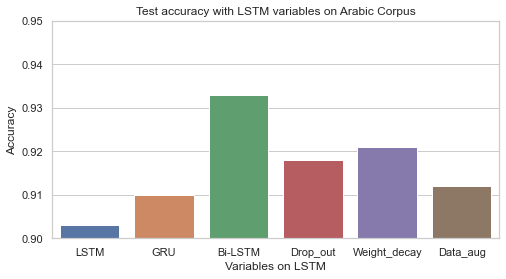

In [59]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.barplot(data=df1,x="Variables on LSTM",y="Accuracy").set_title("Test accuracy with LSTM variables on Arabic Corpus")
plt.ylim([0.9,0.95])
plt.show()

## Visualization for test accuracy performance of 11 languages on original LSTM model between 2 embedding and hidden state dimensions

In [60]:
dict2={"language":["ar","zh","en","el","es","ko","ja","sv","hu","he","hi"]*2,"em_hid_dim":["32/64"]*11+["40/80"]*11,
      "accuracy":[0.903,0.839,0.831,0.881,0.935,0.706,0.926,0.858,0.718,0.855,0.935,0.914,0.844,0.844,0.888,0.944,0.769,0.928,0.864,0.721,0.884,0.916]}

df2=pd.DataFrame.from_dict(dict2)
print(df2)

   language em_hid_dim  accuracy
0        ar      32/64     0.903
1        zh      32/64     0.839
2        en      32/64     0.831
3        el      32/64     0.881
4        es      32/64     0.935
5        ko      32/64     0.706
6        ja      32/64     0.926
7        sv      32/64     0.858
8        hu      32/64     0.718
9        he      32/64     0.855
10       hi      32/64     0.935
11       ar      40/80     0.914
12       zh      40/80     0.844
13       en      40/80     0.844
14       el      40/80     0.888
15       es      40/80     0.944
16       ko      40/80     0.769
17       ja      40/80     0.928
18       sv      40/80     0.864
19       hu      40/80     0.721
20       he      40/80     0.884
21       hi      40/80     0.916


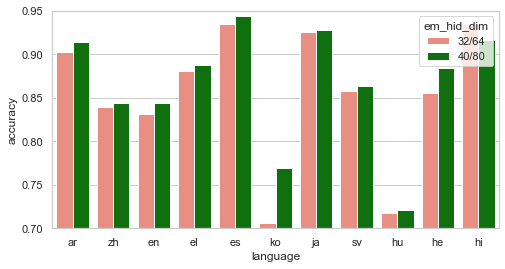

In [61]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
ax=sns.barplot(data=df2,x="language",y="accuracy",hue="em_hid_dim",palette=["salmon","green"])
plt.ylim([0.7,0.95])
plt.show()

## Visualization for test accuracy performance of Japanese corpus between UD tag sets and Japanese specific tag sets

In [91]:
dict3={"Tag":["UD","Specific"],"Accuracy":[0.928,0.937]}
df3=pd.DataFrame.from_dict(dict3)
print(df3)

        Tag  Accuracy
0        UD     0.928
1  Specific     0.937


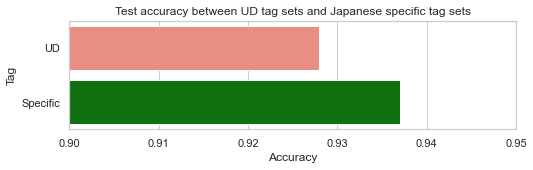

In [97]:
plt.figure(figsize=(8,2))
sns.set_theme(style="whitegrid")
sns.barplot(data=df3,x="Accuracy",y="Tag",palette=["salmon","green"]).set_title("Test accuracy between UD tag sets and Japanese specific tag sets",)
plt.xlim([0.9,0.95])
plt.show()